# Кредитный скоринг

# Оглавление


<a href='#1' > 1. Выяснение общей картины
    
    
<a href='#1.1'> 1.1 Как будет использоваться наше решение 
    
<a href='#1.3'> 1.3 Как выглядят текущие решения/обходные пути (если они есть)?

<a href='#1.4'> 1.4 Как мы должны сформулировать задачу (обучение с учителем/без учителя, динамическое/автономное обучение и т.д.)?
    
<a href='#1.5'> 1.5 Как мы должны измерять эффективность
    
<a href='#1.12'> 1.12 Проверка предположений (по возможности)
    
<a href='#2'> 2. Получение данных
    
<a href='#2.7'> 2.7 Получение данных
    
<a href='#2.10'> 2.10 Выяснение размера и типа данных (временной ряд, выборка, географические и т.д)
    
<a href='#2.11'> 2.11 Выборка испытательного набора, отложить его и нетрогать!)

<a href='#3'> 3. Обнаружение и визуализация данных для понимания их сущности (исследование данных)

<a href='#3.1'> 3.1 Создание копии данных для использования    

<a href='#3.2'> 3.2 Изучение каждого атрибута и его характеристик
    
<a href='#3.3'> 3.3 Идетификация целевой переменной
    
<a href='#3.4'> 3.4 Визуализация данных
    
<a href='#3.5'> 3.5 Исследование взаимосвязи между атрибутами
    
<a href='#3.6'> 3.6 Эксперементирование с комбинацией атрибутов (feature engineering)
    
<a href='#4'> 4. Подготовка данных для алгоритмов машинного обучения
    
<a href='#4.1'> 4.1 Очистка данных
    
<a href='#4.2'> 4.2 Удаление ненужных признаков
    
<a href='#4.3'> 4.3 Создание новых признаков    
    
<a href='#4.4'> 4.4 Масштабирование № 1. Специальные трансформеры
    
<a href='#4.5'> 4.5 Масштабирование №2. Нормализация и стандартизация    
    
<a href='#5'> 5. Выбор модели и ее обучение
    
<a href='#5.1'> 5.1 Обучение о оценка с помощью обучающего набора
    
<a href='#5.2'> 5.2 Кросс-валидация
6. Точная настройка модели
7. Представление своего решения
8. Запуск, наблюдение сопровождение системы


<a id='1'></a>
## 1. Постановка задачи и выяснение общей картины

Общее описание картины:

Есть датасет с информацией по банковским клиентам. Нужно на основе него классифицировать клиентов на надежных и ненадежных

#################################


<a id='1.1'> </a>
### 1.1 Как будет использоваться наше решение

На выходе необходимо получить вероятность, с которой клиент относится к той или иной категории. Далее вопрос решается менеджером банка.

<a id='1.2'> </a>
### 1.2 Как выглядят текущие решения?

В: На что похоже решение сейчас? Как сейчас решают давать кредит или нет?

О: Сейчас решение о выдачи кредита принимает менеджер банка на основе накопленного опыта. 

Это накладно и не всегда верно.

<a id='1.4'> </a>
### 1.4 Как мы должны сформулировать задачу (обучение с учителем/без учителя, динамическое/автономное обучение и т.д.)?

Это задача:
- обучение с учиетелем
- классификация
- в данном случае пакетное обучение - потому, что нет потока данных и их мало.


<a id='1.5'> </a>
### 1.5 Как мы должны измерять эффективность 

В данном случае мы ищем наилучшее значение ROC - AUC. Хотя для несбалансированных классов лучше смотреть на соотношение "точность/полнота".  

# Проверка некоторых установок и атоматичсекое сохранение картинок

In [4]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve

# Common imports
import numpy as np
import pandas as pd
import os
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
# Установка random_seed
RS = 42

<a id='2'></a>
## 2. Получение данных


##### 2.1 Создаем главный сет

In [5]:
train = pd.read_csv('train.csv')

In [6]:
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [7]:
train.shape

(73799, 19)

##### 2.2 Описание признаков

##### Вам предоставлена информация из анкетных данных заемщиков и факт наличия дефолта.

Описания полей client_id - идентификатор клиента

education - уровень образования

sex - пол заемщика

age - возраст заемщика

car - флаг наличия автомобиля

car_type - флаг автомобиля иномарки

decline_app_cnt - количество отказанных прошлых заявок

good_work - флаг наличия “хорошей” работы

bki_request_cnt - количество запросов в БКИ

home_address - категоризатор домашнего адреса

work_address - категоризатор рабочего адреса

income - доход заемщика

foreign_passport - наличие загранпаспорта

sna - связь заемщика с клиентами банка

first_time - давность наличия информации о заемщике

score_bki - скоринговый балл по данным из БКИ

region_rating - рейтинг региона

app_date - дата подачи заявки

default - флаг дефолта по кредиту

<a id='2.10'> </a>
##### 2.3 Выяснение размера и типа данных

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [9]:
#Проверим датасет на наличие дубликатов:
if len(train)>len(train.drop_duplicates()):
    print('Дубликаты есть')
    display(train[train.duplicated()])
else:
    print('Дубликатов нет')

Дубликатов нет


In [10]:
train.describe()

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,-1.904724,2.000339,56.725701,1.575509,2.496280,41099.775417,1.733330,2.765458,0.126994
std,31841.921168,11.520378,0.804272,0.371087,0.498231,2.252073,13.055717,0.527631,0.689818,46166.322400,1.123622,1.009463,0.332968
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,-2.259534,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,-1.569831,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000


In [11]:
# Посмотрим на пропуски
for col in train.columns:
    pct_missing = train[col].isna().sum()
    print('{} - {}'.format(col, (pct_missing)))

client_id - 0
app_date - 0
education - 307
sex - 0
age - 0
car - 0
car_type - 0
decline_app_cnt - 0
good_work - 0
score_bki - 0
bki_request_cnt - 0
region_rating - 0
home_address - 0
work_address - 0
income - 0
sna - 0
first_time - 0
foreign_passport - 0
default - 0


Пропуски есть только у атрибута "education".

In [12]:
train.client_id.nunique()

73799

Все клиенты уникальны, значит удалим этот признак, он неинформативен. 

In [13]:
train.drop(['client_id'], axis=1, inplace=True)

##### Для упрощения работы с признаками разделим их на группы 

In [14]:
bin_attr = []
cat_attr = []
num_attr = []
for col in train.columns:
    if col == 'default' or col == 'app_date':
        continue
    print(col, train[col].nunique())
    if train[col].nunique() == 2:
        print('Бинарный признак', train[col].unique())
        print('#'*10)
        bin_attr.append(col)
    elif 2 < train[col].nunique() < 10:
        print('Категориальный признак', train[col].unique())
        print('#'*10)
        cat_attr.append(col)
    else:
        num_attr.append(col)

education 5
Категориальный признак ['SCH' 'GRD' 'UGR' 'PGR' 'ACD' nan]
##########
sex 2
Бинарный признак ['M' 'F']
##########
age 52
car 2
Бинарный признак ['Y' 'N']
##########
car_type 2
Бинарный признак ['Y' 'N']
##########
decline_app_cnt 21
good_work 2
Бинарный признак [0 1]
##########
score_bki 69096
bki_request_cnt 38
region_rating 7
Категориальный признак [50 80 60 40 70 20 30]
##########
home_address 3
Категориальный признак [1 2 3]
##########
work_address 3
Категориальный признак [2 3 1]
##########
income 966
sna 4
Категориальный признак [4 1 2 3]
##########
first_time 4
Категориальный признак [1 4 3 2]
##########
foreign_passport 2
Бинарный признак ['N' 'Y']
##########


# EDA

##### 2.4 Осмотр числовых признаков, с помощью гистограмм

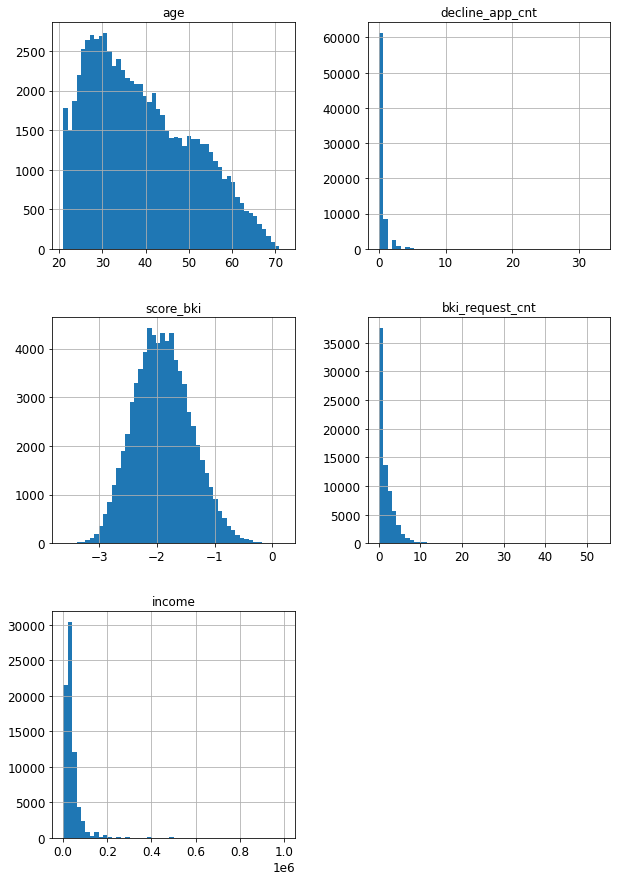

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

train[num_attr].hist(bins=50, figsize=(10,15));

##### Что можно отметить в данных

- Признак "age" распределен c длинным правым хвостом

- Признак "decline_app_cnt". Большинству клиентов не отказывали в кредитах. Судя по гистограмме есть выбросы. Далее уточним это.

- Признак "bki_request_cnt". Распределение с длинным правым хвостом. Большинство не делали запросов в БКИ. Возможно те, что в "хвосте" либо выбросы, либо очень жадные до БКИ клиенты.

- Признак "score_bki" может быть отрицательным и у него нормальное распределение.

- Признак "income". Доход. Распределение с длинным правых хвостом.
            
Итог:
      
- Признаки имеют разные масштабы. Необходима нормализация 

- Еще у нас есть проблема ввиде расбалансировки классов. Придется применять under/oversmaoling и прочее

- Многие гистограмы имеют длинные хвосты. Это может затруднить алгоритму находить паттерны. Скорее всего тоже дело в нормализации. Нам нужно получать нормальные распределения. Сразу посмотрим, каким численным признакам поможет логорифмирование




In [20]:
def log_and_print(DataFrame):
    num_attr = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']
    n = len(num_attr) # количество рисунков 
    i = 1 # номер рисунка
    plt.figure(figsize=(8,24))
    for col in num_attr:
        new_col = col+'_log'
        DataFrame[new_col] = DataFrame[col].apply(lambda x: np.log(x + 1))
        plt.subplot(n,1,i)
        DataFrame[new_col].hist()
        plt.xlabel(new_col, fontsize=12, color='blue')
        plt.ylabel('Количество', fontsize=12, color='blue')
        plt.title('Лог-распределение атрибута "{}"'.format(col), fontsize=14, color='green')
        plt.grid(which='major', linewidth=1.2) # Главная 
        plt.grid(which='minor', linestyle='--', color='gray', linewidth=0.5) # Вспомогательная
        plt.minorticks_on() # Включить показ минорной сетки
        i+=1

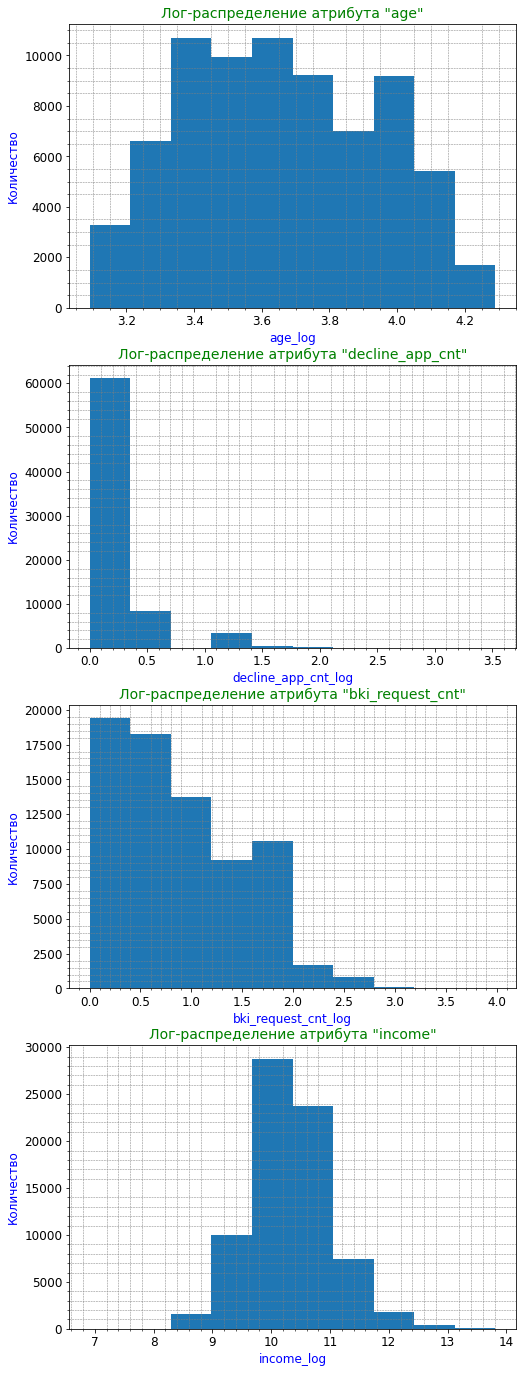

In [21]:
log_and_print(train)

Вывод: В дальнейшем, перед нормализацией, логарифмируем признаки "age" и "income".

##### Осмотр числовых признаков с помощью бокс-плотов

In [22]:
def box_plot_print(DataFrame):
    num_attr = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']
    n = len(num_attr) # количество рисунков 
    i = 1 # номер рисунка
    plt.figure(figsize=(8,25))
    for col in num_attr:
        plt.subplot(n,1,i)
        sns.boxplot(x='default', y=col, data=DataFrame)
        plt.xlabel('default', fontsize=12, color='blue')
        
        plt.title('Бокс-плот для атрибута "{}"'.format(col), fontsize=14, color='green')
        plt.grid(which='major', linewidth=1.2) # Главная 
        plt.grid(which='minor', linestyle='--', color='gray', linewidth=0.5) # Вспомогательная
        plt.minorticks_on() # Включить показ минорной сетки
        
        i+=1

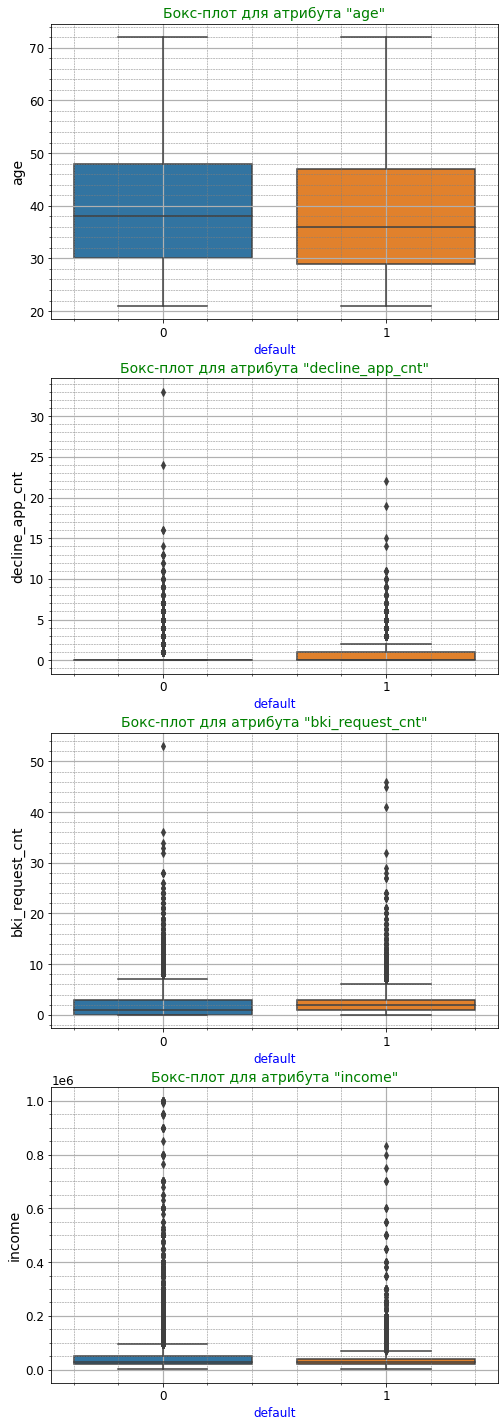

In [23]:
box_plot_print(train)

Вывод: С возрастом все нормально, клиент в 70 лет может брать кридит. У признака income есть выбросы, но они в пределах нормы. То есть доход в 100_000 вполне реален. Не будем трогать этот признак.

Запросить свою кредитную историю (bki_request_cnt) более 50 раз, тоже реально, как и получить 
более 30 отказов. Однако в модель попадет много выбросов. Хороший вариант будет объединить клиентов с высоки мколичеством запросов и отказов о отдельные категории и потом распылить на фиктивные переменные. 

##### Корреляция числовых признаков

In [24]:
corr_matrix = train[num_attr].corr()
corr_matrix

,age,decline_app_cnt,score_bki,bki_request_cnt,income
age,1.000000,-0.111175,-0.106275,0.046265,-0.018900
decline_app_cnt,-0.111175,1.000000,0.189987,0.155894,-0.021687
score_bki,-0.106275,0.189987,1.000000,0.156257,-0.012639
bki_request_cnt,0.046265,0.155894,0.156257,1.000000,0.082983
income,-0.018900,-0.021687,-0.012639,0.082983,1.000000


<AxesSubplot:>

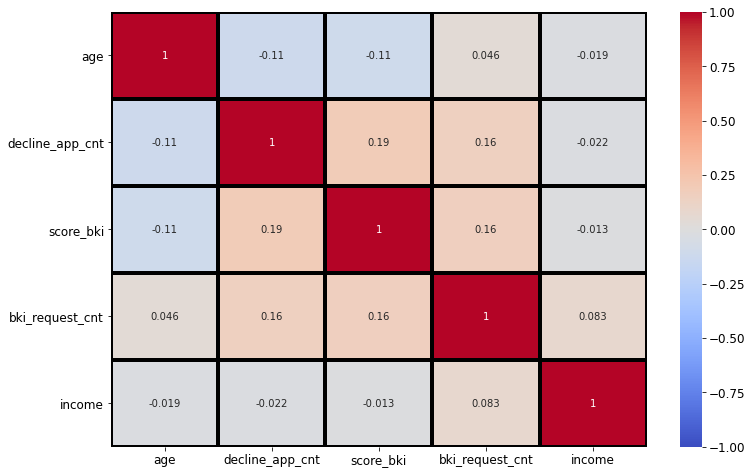

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap= 'coolwarm', linewidths=3, linecolor='black')

Сильных корреляций нет. Мультиколлинеарности нет. Слабые до 0.2 корреляции наблюдаются между запросами кредитной истории, скоринговым баллом и отказам по кридиту. 
А также слабая обратная корреляция между возрастом и отказом по кредиту и скоринговым баллом. 

##### 2.5 Осмотр категориальных признаков

In [26]:
def print_cat_attr(DataFrame):
    # cat_attr = [c for c in DataFrame.columns if DataFrame[c].dtype.name == 'object']
    n = len(cat_attr) # количество рисунков 
    i = 1 # номер рисунка
    plt.figure(figsize=(15,33))
    for col in cat_attr:
        plt.subplot(n,1,i)
        sns.countplot(data=DataFrame, hue='default', x=col)
        plt.xlabel('Количество', fontsize=12, color='blue')
        plt.ylabel(col, fontsize=12, color='blue')
        plt.title('Распределение атрибута "{}"'.format(col), fontsize=14, color='green')
        plt.grid(which='major', linewidth=1.2) # Главная 
        plt.grid(which='minor', linestyle='--', color='gray', linewidth=0.5) # Вспомогательная
        plt.minorticks_on() # Включить показ минорной сетки
        i+=1


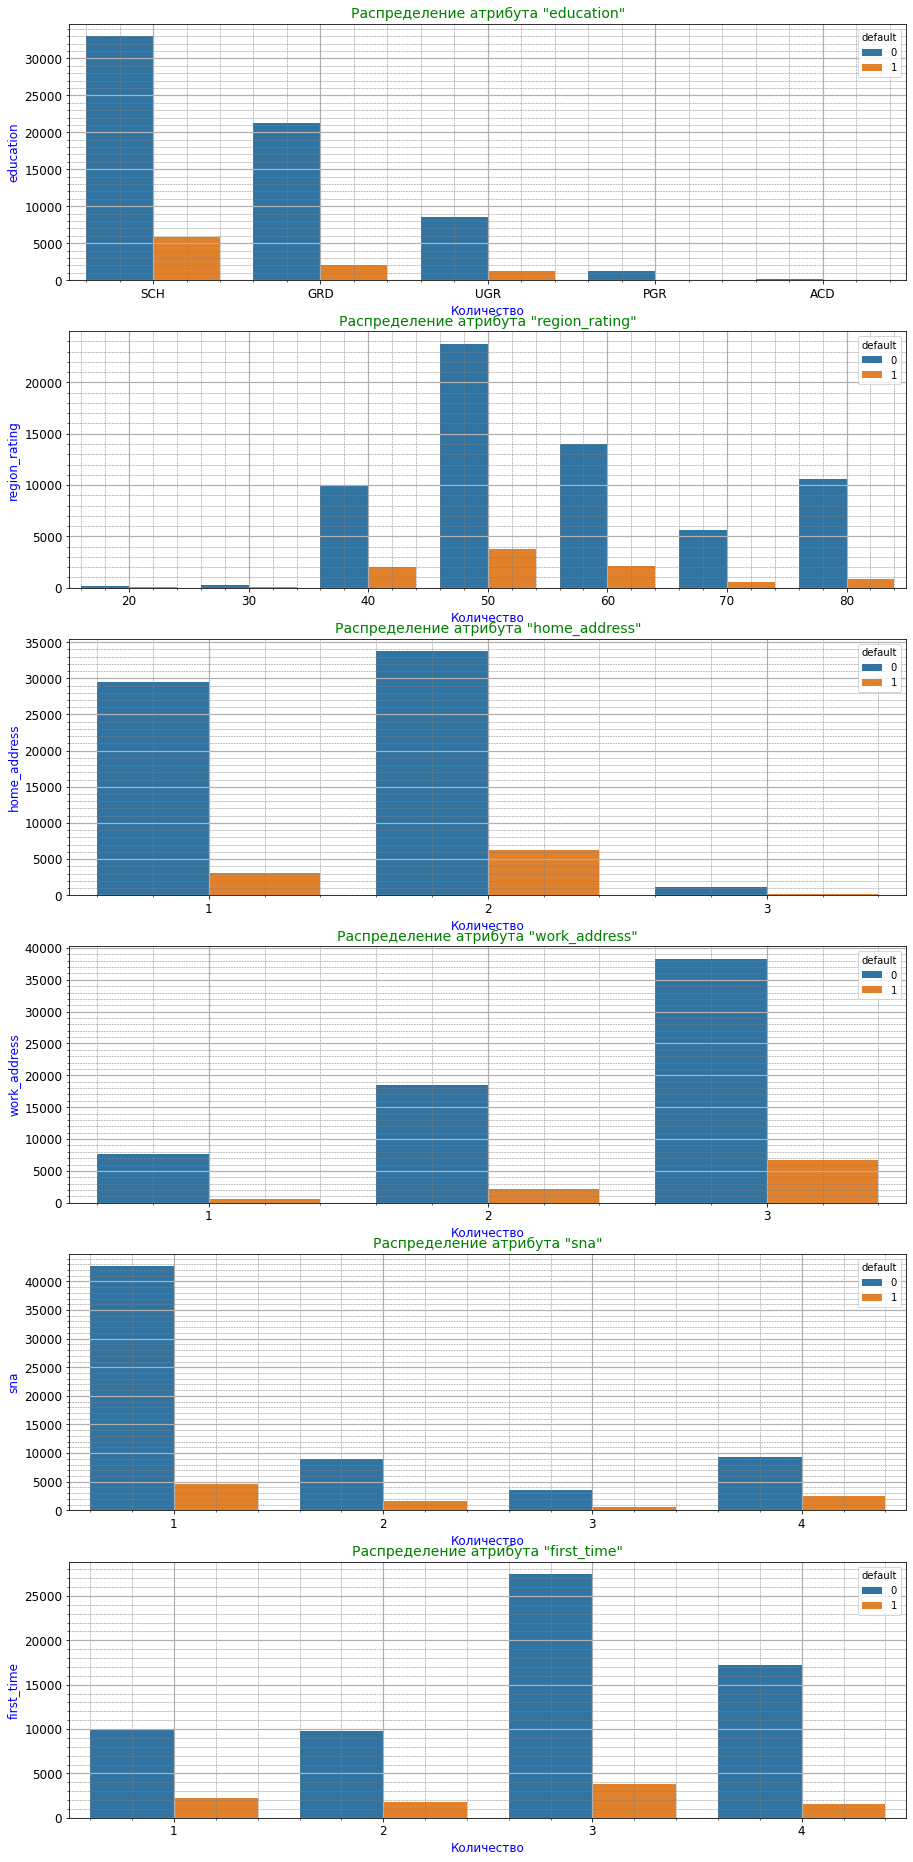

In [27]:
print_cat_attr(train)

Вывод:

- Признак "education' явно имеет зависимость с количеством дефолтных клиентов. Чем выше уровень образования, тем меньше дефолтов.

- Существует и какая-то зависимость дефолтов от региона, но незная что именно означают регионы, что-то точно сказать нельзя.

Остальные признаки визуально выглядят пропорционально

##### 2.6 Заполнение пропусков у атрибута 'education'

Заменим на самое частое значение - SCH. Скорее всего это сокращение от "School". Используем для этого SimpleImputer из sklearn

In [28]:
from sklearn.impute import SimpleImputer
edu_imputer = SimpleImputer(strategy='most_frequent')
train['education'] = edu_imputer.fit_transform(train[['education']])

In [29]:
train.isnull().sum()

app_date               0
education              0
sex                    0
age                    0
car                    0
car_type               0
decline_app_cnt        0
good_work              0
score_bki              0
bki_request_cnt        0
region_rating          0
home_address           0
work_address           0
income                 0
sna                    0
first_time             0
foreign_passport       0
default                0
age_log                0
decline_app_cnt_log    0
bki_request_cnt_log    0
income_log             0
dtype: int64

In [55]:
def print_def_per_edu(DateFrame):
    '''
    
    '''
    dd = train['education'].value_counts().to_dict()
    mean_inc = train.groupby(by = 'education')['income'].agg('mean').reset_index()
    mean_inc['cnt'] = mean_inc['education'].apply(lambda x: dd[x])
    mean_inc = mean_inc.sort_values(by=['cnt'], ascending=False)
    
    
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 2, 1])
    sns.countplot(data=train, hue='default', x='education', ax=axes)
    #a = 0.13
    #for i in range(4):

        #plt.text(a, 2800., '{}%'.format(dop_2['def_per'].loc[i]), fontsize=15)
        #a += 1
    

    axes2 = axes.twinx()

    axes2.plot(mean_inc['education'], mean_inc['income'], color = 'red', label='Средняя прибыль')
    axes2.grid(axis = 'y')
    axes.set_ylabel('Количесвто клиентов')
    axes.set_xlabel('Месяцы')
    axes2.set_ylabel('Средняя прибыль');

Посмотрим как зависит оуровень образования от среднего дохода. 

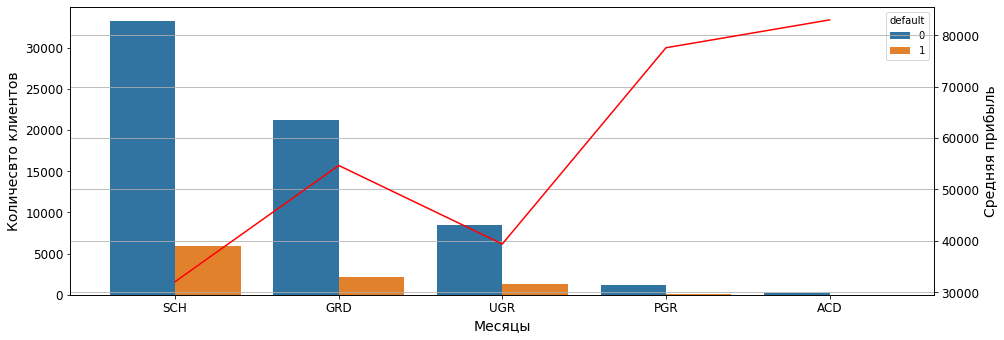

In [56]:
print_def_per_edu(train)

Видна зависимость уровня дохода от образования. Учитывая, что UGR  это урвоень ниже, чем GRD. Поэтому дальше, закодируем этот признак как порядковый категориальный.

##### Анализ бинарных признаков

In [58]:
def print_bin_attr(DataFrame):
    # cat_attr = [c for c in DataFrame.columns if DataFrame[c].dtype.name == 'object']
    n = len(bin_attr) # количество рисунков 
    i = 1 # номер рисунка
    plt.figure(figsize=(15,30))
    for col in bin_attr:
        plt.subplot(n,1,i)
        sns.countplot(data=DataFrame, hue='default', x=col)
        plt.xlabel(col, fontsize=12, color='blue')
        plt.ylabel('Количество', fontsize=12, color='blue')
        plt.title('Распределение атрибута "{}"'.format(col), fontsize=14, color='green')
        plt.grid(which='major', linewidth=1.2) # Главная 
        plt.grid(which='minor', linestyle='--', color='gray', linewidth=0.5) # Вспомогательная
        plt.minorticks_on() # Включить показ минорной сетки
        i+=1


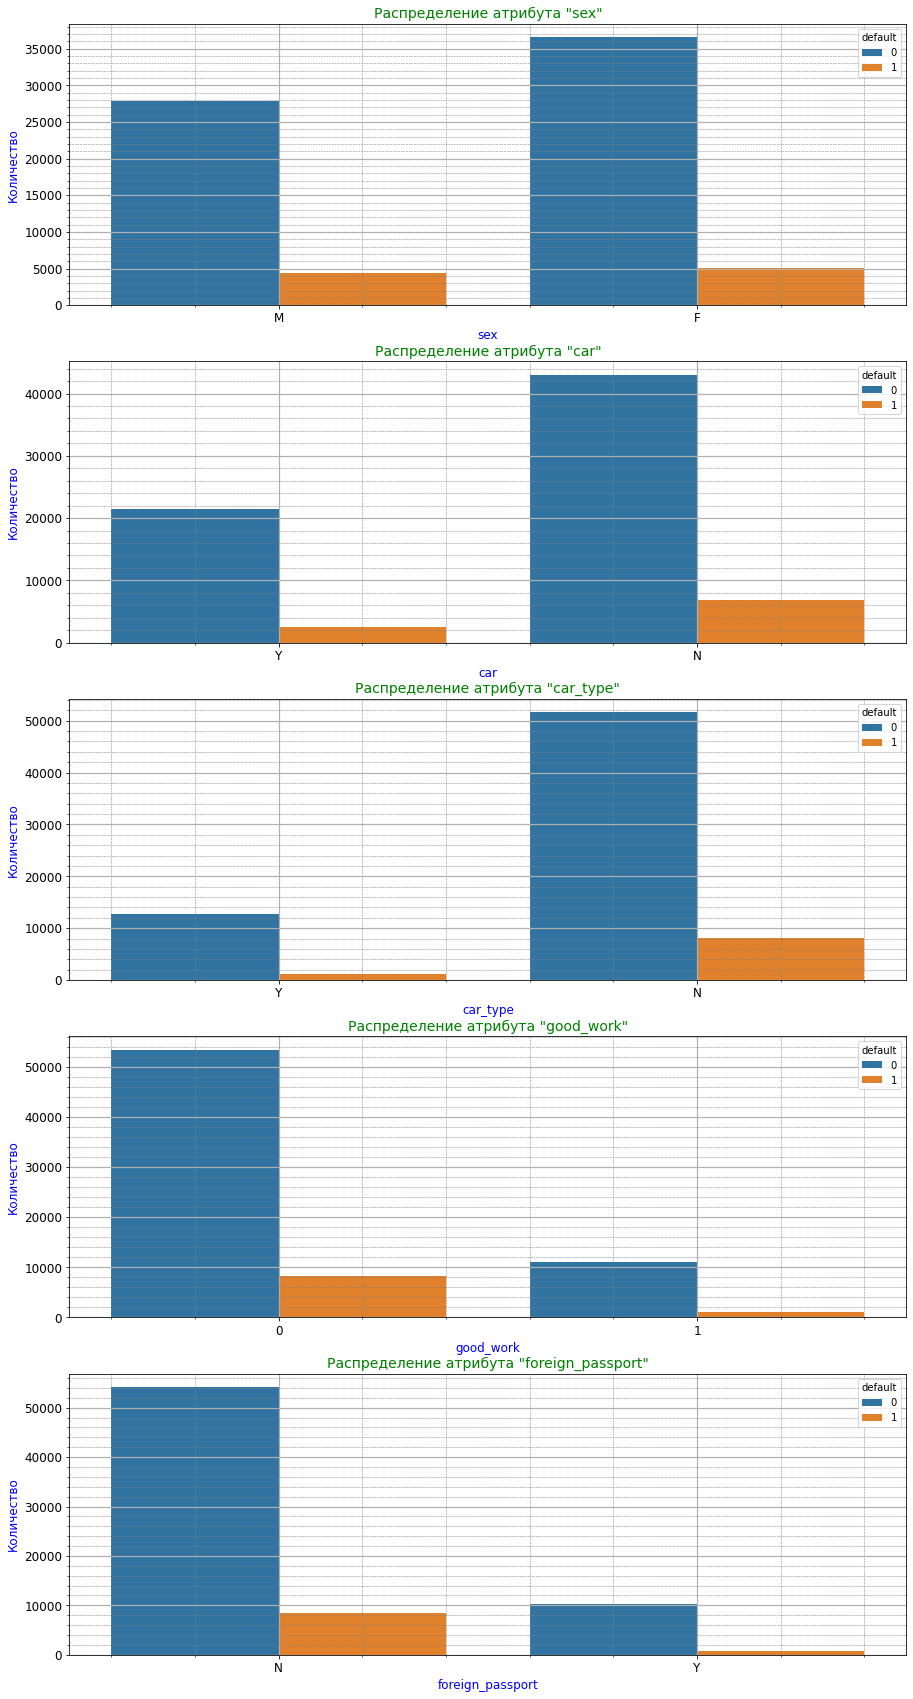

In [59]:
print_bin_attr(train)

Можно отметить следующее:
У кого нет автомобиля, иномарки, загранпаспорта и хорошей работы чаще оказываются дефолтными.

##### Осмотр признака даты

In [60]:
# конвертируем в тип datetime
train['new_date'] = pd.to_datetime(train['app_date'])
# посмотрим года
display(train['new_date'].dt.year.value_counts())
# посмотрим месяцы
display(train['new_date'].dt.month.value_counts())

2014    73799
Name: new_date, dtype: int64

3    21178
2    18028
4    17683
1    16910
Name: new_date, dtype: int64

Год у нас один. А месяцы это первые 4 месяца года.

In [61]:
train['new_date'] = train['new_date'].dt.month

In [62]:
def print_def_per_income(DateFrame):
    '''
    
    '''
    def def_per_month(d):
        dop_1 = train['new_date'].value_counts().sort_index()
        for i in range(1,5):
            new_d = round((d/dop_1[i])*100,2)
            return new_d
    dop_2 = train.groupby(by = 'new_date')['default'].agg('sum').reset_index()
    dop_2['def_per'] = dop_2['default'].apply(def_per_month)
    
    mean_in = train.groupby(by = 'new_date')['income'].agg('mean').reset_index()
    mean_in['new_date'] = mean_in['new_date'].apply(lambda x: {1:'Январь', 2:'Февраль', 3:'Март', 4:'Апрель'}[x])
    mean_in
    
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 2, 1])
    sns.countplot(data=train, hue='default', x='new_date', ax=axes)
    a = 0.13
    for i in range(4):

        plt.text(a, 2800., '{}%'.format(dop_2['def_per'].loc[i]), fontsize=15)
        a += 1
    

    axes2 = axes.twinx()

    axes2.plot(mean_in['new_date'], mean_in['income'], color = 'red', label='Средняя прибыль')
    axes2.grid(axis = 'y')
    axes.set_ylabel('Количесвто клиентов')
    axes.set_xlabel('Месяцы')
    axes2.set_ylabel('Средний доход в месяц');

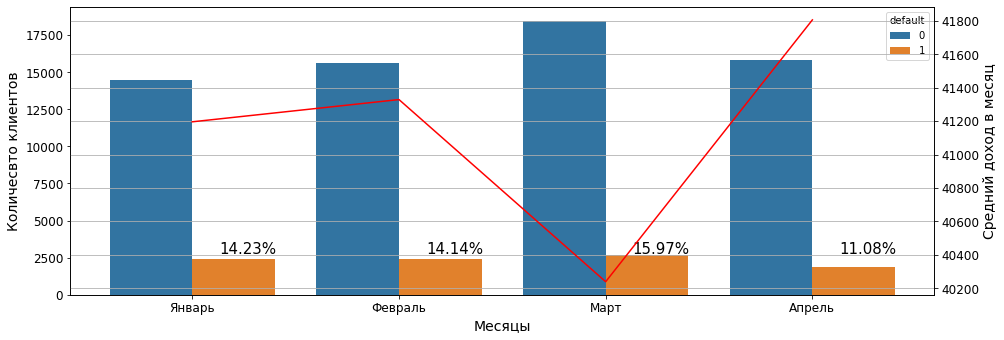

In [63]:
print_def_per_income(train)

Из графика следует, что имеется некоторая зависимость между признанием клиента дефолтным и средним доходом. Можно сделать вывод, что в марте когда средний доход был минимален, был макисмальный процент фефолтных клиентов. Вполне возможно, что это
как-то связано с политическими событиями происходящими в мире в 2014 году...

Здесь нужно решить как в дальнейшем кодировать признак даты. В целом можно было бы присвоить каждому месяцу веса, в зависимости от среднего дохода или количества дефолтных клиентов, но это не будет точным. Мы не знаем, как будет меняться ситуация в дальнешем. Поэтому, оставим это на усмотрение машины и превратим этот признак в фиктивную переменную. 
Но потом. 
Сейчас отнесем его к категориальным признакам

In [66]:
cat_attr.append('new_date')

In [67]:
train

,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,income,sna,first_time,foreign_passport,default,age_log,decline_app_cnt_log,bki_request_cnt_log,income_log,new_date
0,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,...,18000,4,1,N,0,4.143135,0.000000,0.693147,9.798183,2
1,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,...,19000,4,1,N,0,4.094345,0.000000,1.386294,9.852247,3
2,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,...,30000,1,4,Y,0,3.258097,1.098612,0.693147,10.308986,2
3,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,...,10000,1,3,N,0,3.988984,0.000000,1.098612,9.210440,1
4,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,...,30000,1,4,Y,0,3.891820,0.000000,0.693147,10.308986,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,...,17000,4,4,N,0,3.828641,0.000000,1.386294,9.741027,3
73795,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,...,70000,1,4,N,0,3.737670,0.000000,0.693147,11.156265,3
73796,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,...,45000,2,2,N,0,3.465736,0.000000,1.609438,10.714440,4
73797,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,...,13000,2,3,N,1,3.401197,0.000000,1.386294,9.472782,1


Уберем признак даты, и логорифмированнеые колонки для проверки нормальных распределений

In [68]:
train.drop(['app_date', 'age_log', 'decline_app_cnt_log', 'bki_request_cnt_log', 'income_log'], axis=1, inplace=True)

##### 2.7 На данном этапе мы немого преобразили базовый сет. Убрав неинформативные колонки и заполнили пропуски.  Далее создадим копию сета для дальнейших манипуляций и разделим его на train_train, и train_test.



In [69]:
train.head()

,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,new_date
0,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0,2
1,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0,3
2,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0,2
3,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0,1
4,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0,4


In [70]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train, test_size=0.2, random_state=RS)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=RS)
for train_index, test_index in split.split(train, train['default']):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]

Посмотрим сравнение пропорций по содержанию налчия/отсутствия дефолта в общем датасете и в тестовом.

In [71]:
def income_cat_proportions(data):
    return data["default"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Общий_сет": income_cat_proportions(train),
    "Страт_сет": income_cat_proportions(strat_test_set),
    "Случайный_сет": income_cat_proportions(test_set),
}).sort_index()
compare_props["%Ошибки в случайном"] = 100 * compare_props["Случайный_сет"] / compare_props["Общий_сет"] - 100
compare_props["%Ошибки в стартифиц."] = 100 * compare_props["Страт_сет"] / compare_props["Общий_сет"] - 100

In [72]:
compare_props

,Общий_сет,Страт_сет,Случайный_сет,%Ошибки в случайном,%Ошибки в стартифиц.
0,0.873006,0.873035,0.87622,0.36805,0.003301
1,0.126994,0.126965,0.12378,-2.53013,-0.022695


Как видно пропрции при стратифицированном спосбе более близки к общей выборке. Далее будем использовать: 
- strat_train_set

и

- strat_test_set (его отложим пока, что)

In [73]:
strat_train_set.shape, strat_test_set.shape

((59039, 18), (14760, 18))

In [74]:
train = strat_train_set.copy()

In [75]:
num_attr

['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income']

In [76]:
cat_attr

['education',
 'region_rating',
 'home_address',
 'work_address',
 'sna',
 'first_time',
 'new_date',
 'new_date']

In [494]:
bin_attr

['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

##### Подготовка pipeline для применения трансформаций данных, описанных выше
Зедсь мы собираемся сделать следующее:
- Логарифмировать признаки "age" и "income"

- Создать категории у признаков "bki_request_cnt" и "decline_app_cnt"

- Добавить бинарный признак, объеденив бинарные признаки "car", "car_type", "good_work", "foreign_passport" 
- Стандартизировать все числовые признки

- Добавить полиномы второй степени к числовым признакам (на выбор, не для всех) 

- Перевод категориальных признаков в фиктивные переменные

In [414]:
# Создадим класс-категоризатор
from sklearn.base import BaseEstimator, TransformerMixin

class kategorizator(BaseEstimator, TransformerMixin):
    def __init__(self, edu_cat=True): # log_age - логарифмируем возраст или нет
        self.edu_cat = edu_cat
    
        
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
                    
        def BkiCat(x):
            if 0<= x <=2:
                return 1
            elif 2< x <=6:
                return 2
            elif 6< x <=12:
                return 3
            elif 12 < x <=20:
                return 4
            elif x > 20:
                return 5
        def DecCat(x):
            if x == 0:
                return 1
            elif 1<= x <=2:
                return 2
            elif 2< x <=6:
                return 3
            elif 6 < x <=10:
                return 4
            elif x > 10:
                return 5
        if self.edu_cat:
            
            def EduCat(x):
                if x == 'SCH':
                    return 1
                elif x == 'UGR':
                    return 2
                elif x == 'GRD':
                    return 3
                elif x == 'PGR':
                    return 4
                elif x == 'ACD':
                    return 5
            X["bki_request_cnt"] = X["bki_request_cnt"].apply(BkiCat)
            X["decline_app_cnt"] = X["decline_app_cnt"].apply(DecCat)
            X["education"] = X["education"].apply(EduCat)
            return  X
        else:
            X["bki_request_cnt"] = X["bki_request_cnt"].apply(BkiCat)
            X["decline_app_cnt"] = X["decline_app_cnt"].apply(DecCat)
            return X

In [415]:
# Создадим класс-логарифмизатор
from sklearn.base import BaseEstimator, TransformerMixin

class logarifmizator(BaseEstimator, TransformerMixin):
    def __init__(self, log_age=True): # log_age - логарифмируем возраст или нет
        self.log_age = log_age
    def fit(self, X, y=None):
        return self  # дань уважения трансформаторам sklearn)
    def transform(self, X):
        col_names = ["age", "income"]
        age_ix, income_ix = [train.columns.get_loc(c) for c in col_names]
        X['income'] = X["income"].apply(lambda x: np.log(x + 1))
        if self.log_age:
            X['age'] = X["age"].apply(lambda x: np.log(x + 1))
            #age_log = [math.log(x) for x in X[:, age_ix]]
            #X = np.delete(np.c_[X], age_ix, axis = 1)
            return X #np.c_[X, income_log, age_log]
        else:
            return X #np.c_[X, income_log]

In [46]:
# Создадим класс-полимизатор

['age', 'score_bki', 'income']
class polymizator(BaseEstimator, TransformerMixin):
    def __init__(self, more_poly=True): # more_poly - берем полиномы от всех числовых или только от age
        self.more_poly = more_poly
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.more_poly:
            X['age_poly_2'] = X["age"].apply(lambda x: x**2)
            X['score_bki_poly_2'] = X["score_bki"].apply(lambda x: x**2)
            X['income_poly_2'] = X["income"].apply(lambda x: x**2)
            return X
        else:
            X['age_poly_2'] = X["age"].apply(lambda x: x**2)
            return X 

In [47]:
attr_adder = logarifmizator()
train = attr_adder.transform(train)

In [48]:
attr_adder = kategorizator()
train = attr_adder.transform(train)

In [49]:
attr_adder = polymizator()
train = attr_adder.transform(train)

In [50]:
from sklearn.preprocessing import OrdinalEncoder
cat_cat = cat_attr + bin_attr
for col in cat_cat:
    common_encoder = OrdinalEncoder() #  Создаем объект класса OrdinalEncoder
    train[col] = common_encoder.fit_transform(train[[col]]) # фит_трансформ..

<AxesSubplot:>

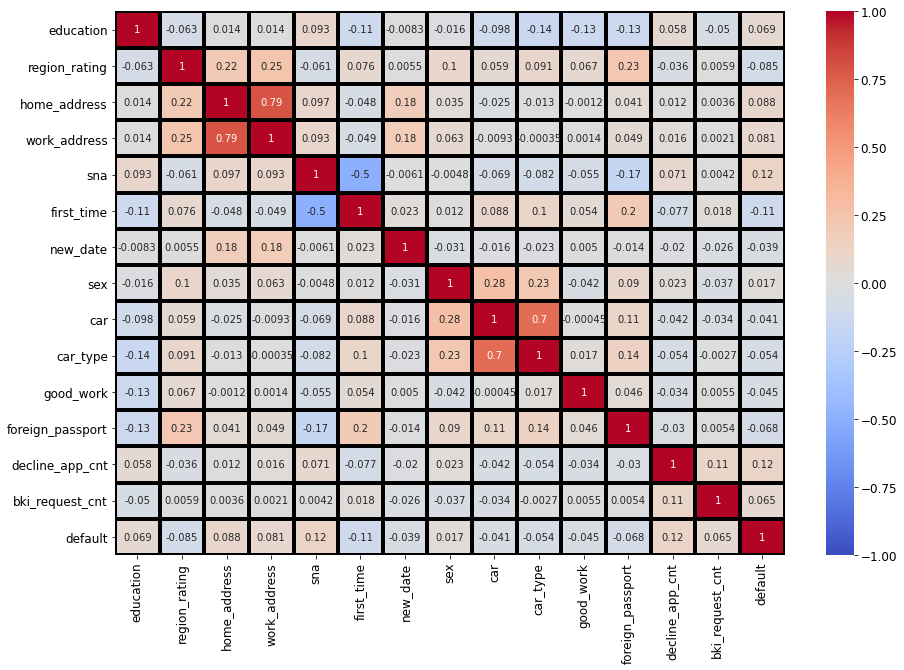

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(train[cat_attr + bin_attr+['decline_app_cnt', 'bki_request_cnt', 'default']].corr(method='spearman'),
                                            annot=True,
                                            vmin=-1,
                                            vmax=1,
                                            cmap= 'coolwarm',
                                            linewidths=3,
                                            linecolor='black')


Матрица корреляций категориальных признаков, выявила несколько посягательств на мультиколлинеарность.

- Признаки домашний и рабочий адрес коррилируеют между собой очень сиьно. Оставим признак домашнего адреса, так как это недвижимость и скорее всего может рассматриваться как объект залога. 

- Признаки наличия машины и машины иномарки также коррилирую сильно. Оставим признак машины иномарки. 

<B- Есть корреляция 0.5 между признакми sna и first_time. Оставим из них тот, что сильнее коррелирует с дефолтом. Это sna.\B> 


Посмотрим на важность категориальных переменных:

<AxesSubplot:>

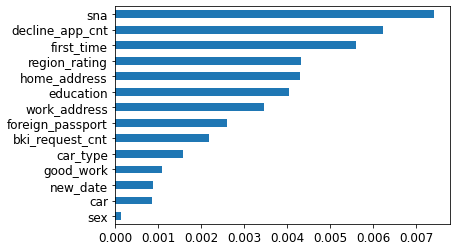

In [52]:
from sklearn.feature_selection import mutual_info_classif

imp_cat = pd.Series(mutual_info_classif(train[cat_attr + bin_attr+['decline_app_cnt', 'bki_request_cnt']], train['default'],
                                     discrete_features =True), index = cat_attr + bin_attr+['decline_app_cnt', 'bki_request_cnt'])
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

В итоге удалим признаки "work_address", "car", "sex". 

In [53]:
#%%time
#spec_train = train.drop(['default'], axis=1)
#from sklearn.manifold import TSNE
#tsne = TSNE(random_state=RS)
#tsne.fit(train)

In [54]:
#tsne.embedding_.shape

In [55]:
#plt.scatter(tsne.embedding_[train['default'].values, 0],
           #tsne.embedding_[train['default'].values, 1], color='blue',);
#plt.scatter(tsne.embedding_[~train['default'].values, 0],
            #tsne.embedding_[~train['default'].values, 1], color='orange',);

In [56]:
train.drop(["work_address", "car", "sex"], axis=1, inplace=True)

In [57]:
train

,education,age,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,income,sna,first_time,foreign_passport,default,new_date,age_poly_2,score_bki_poly_2,income_poly_2
19791,1.0,3.912023,0.0,1,1.0,-1.035399,2,3.0,0.0,11.002117,0.0,2.0,1.0,0,2.0,15.303924,1.072051,121.046568
49335,3.0,3.218876,0.0,1,0.0,-1.478990,1,3.0,0.0,9.903538,0.0,2.0,0.0,0,2.0,10.361162,2.187410,98.080056
41747,3.0,3.218876,0.0,1,0.0,-2.379095,1,6.0,1.0,10.714440,0.0,1.0,0.0,0,1.0,10.361162,5.660092,114.799224
62167,3.0,3.555348,0.0,1,0.0,-2.808098,1,3.0,0.0,10.308986,3.0,1.0,0.0,0,3.0,12.640500,7.885413,106.275192
63663,3.0,4.077537,0.0,2,0.0,-2.659345,1,2.0,1.0,10.308986,0.0,2.0,0.0,0,2.0,16.626312,7.072114,106.275192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32943,4.0,3.178054,0.0,2,1.0,-0.974357,1,3.0,0.0,9.615872,0.0,2.0,0.0,1,2.0,10.100026,0.949371,92.464997
22747,3.0,3.850148,0.0,1,0.0,-1.774444,1,2.0,0.0,10.043293,0.0,0.0,0.0,1,2.0,14.823637,3.148650,100.867734
19710,3.0,4.007333,0.0,1,0.0,-1.815733,1,2.0,0.0,9.798183,0.0,2.0,0.0,0,0.0,16.058719,3.296887,96.004382
13023,3.0,3.526361,0.0,2,0.0,-2.146289,2,3.0,1.0,10.308986,3.0,0.0,0.0,0,1.0,12.435219,4.606555,106.275192


##### Отделяем признаки от таргета

In [58]:
train_labels = train['default']
train = train.drop(['default'], axis=1)


##### Далее мы стандартизируем числовые, и превращаем в фиктивные переменные категориальные признаки

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

norma_attr = ['age', 'score_bki', 'income', 'age_poly_2', 'score_bki_poly_2', 'income_poly_2']
dummy_attr = ['education', 'decline_app_cnt',
              'bki_request_cnt',
              'region_rating',
              'home_address',
              'sna',
              'first_time',
              'new_date']
              
              
norma_attr_2 = ['age', 'score_bki', 'income', 'age_poly_2', 'score_bki_poly_2', 'income_poly_2',
                'region_rating',
              'home_address',
               'first_time']
dummy_attr_2 = ['education', 'decline_app_cnt', 'bki_request_cnt', 'sna', 'first_time', 'new_date' ]


In [60]:
# Создаем общий конвейр 
full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), norma_attr), 
        ("cat", OneHotEncoder(), dummy_attr)   # Название/ трансформатор / название столбцов
    ])

train_prepared = full_pipeline.fit_transform(train) # Итоговый сет и все трансформации 

In [61]:
train.shape

(59039, 17)

In [62]:
train_prepared.shape

(59039, 43)

In [63]:
X = train_prepared
Y = train_labels.values

In [126]:
Y[0]

0

In [248]:
def print_precision_recall_vs_threshold(precisions, recalls, thresholds):
    '''
    Функция для отрисовки порога 
    '''
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="upper right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-3, 3, 0, 1])             # Not shown

# Выбор модели ML

На данный момент, стоит разобраться с метриками. Как выяснилось, 

### 1. Простая модель. 

- алгоритм: лог.регрессия

- метод избавления от дисбаланса классов: отсуствует 

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=RS)

##### 1.1 Обучение

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
Model_1 = LogisticRegression(max_iter=1000, random_state=RS)


Model_1.fit(X_train, y_train)
#Значения
y_pred_1 = Model_1.predict(X_test)
# Вероятности
y_pred_probs_1 = Model_1.predict_proba(X_test)

# Посчитаем показатели для обучающего набора, что бы следить за переобучением
#Значения
y_pred_1_train = Model_1.predict(X_train)
# Вероятности
y_pred_probs_1_train = Model_1.predict_proba(X_train)
 
# Для кривой порога
y_scores = cross_val_predict(Model_1, X_train, y_train, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

##### 1.2 Матрица ошибок модели 1

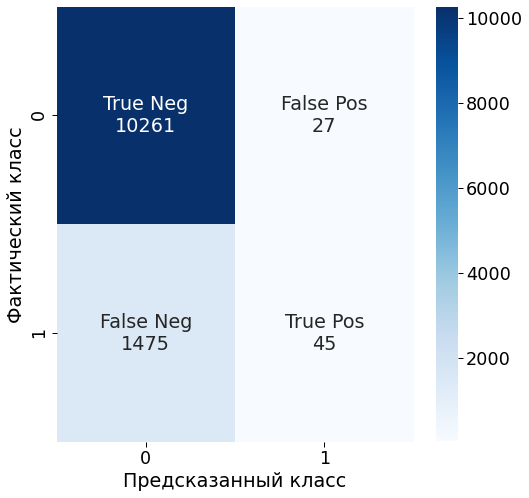

In [235]:
print_CM(y_test, y_pred_1)

##### 1.3 Отрисовка порога (модель 1)

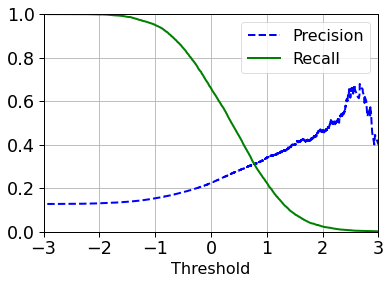

In [253]:
print_precision_recall_vs_threshold(precisions, recalls, thresholds)

##### 1.3 Оценка точность/полнота (модель 1)

Точность - 0.625
Полнота - 0.03
F1 мера - 0.057


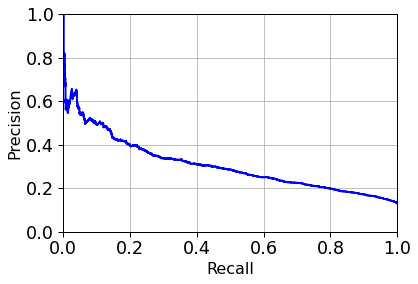

In [254]:
from sklearn.metrics import precision_recall_curve
print_all_score(y_test, y_pred_1, y_pred_probs_1)

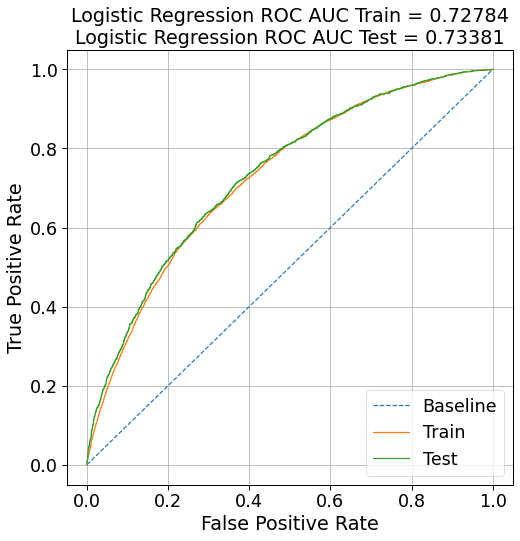

In [255]:
print_ROC_AUC(y_train, y_pred_probs_1_train, y_test, y_pred_probs_1)

У модели высокая точность, но полнота на очень низком уровне. Большинтсву клиентов, которые могут не отдать кредит - кредит выдадут. Очень плохая модель для банка. 
Также стоит обратить внимания, что переобучения в данном случае нет.

In [315]:
def model_compare(model_name, alg_type, balance, Y_TEST, Y_PRED, Y_PRED_PROB, new=True ):
    
    if new:
        list_1 = []
        list_2 = []
        list_3 = []
        list_4 = []
        list_5 = []
        list_6 = []
        list_7 = []
    list_1.append(model_name)
    list_2.append(alg_type)
    list_3.append(balance)
    list_4.append(round(precision_score(Y_TEST, Y_PRED), 3))
    list_5.append(round(recall_score(Y_TEST, Y_PRED), 3))
    list_6.append(round(f1_score(Y_TEST, Y_PRED), 3))
    list_7.append(round(roc_auc_score(Y_TEST, Y_PRED_PROB[:,1]), 6))

    Model_set = pd.DataFrame({
        'Модель': list_1,
        'Алгоритм' : list_2,
        'Баланс' : list_3,
        'Точность' : list_4,
        'Полнота' : list_5,
        'F1 мера' : list_6,
        'ROC AUC' : list_7
    }).sort_index()
    
    return Model_set


In [330]:
Mod1 = model_compare('Модель 1', 'Лог.рег', 'Нет', y_test, y_pred_1, y_pred_probs_1, new=True )

In [398]:
Models = Mod1
Models

,Модель,Алгоритм,Баланс,Точность,Полнота,F1 мера,ROC AUC
0,Модель 1,Лог.рег,Нет,0.625,0.03,0.057,0.733812


### Модель 2.

- алгоритм: лог.регрессия

- метод избавления от дисбаланса классов: class_weight = 'Balanced'

##### 2.1 Обучение

In [266]:
Model_2 = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=RS, )


Model_2.fit(X_train, y_train)
#Значения
y_pred_2 = Model_2.predict(X_test)
# Вероятности
y_pred_probs_2 = Model_2.predict_proba(X_test)

# Посчитаем показатели для обучающего набора, что бы следить за переобучением
#Значения
y_pred_2_train = Model_2.predict(X_train)
# Вероятности
y_pred_probs_2_train = Model_2.predict_proba(X_train)
 
# Для кривой порога
y_scores_2 = cross_val_predict(Model_2, X_train, y_train, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_2)

##### 2.2 Матрица ошибок модели 2

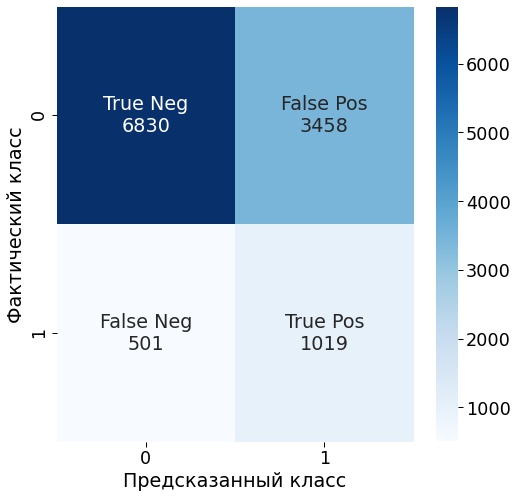

In [267]:
print_CM(y_test2, y_pred_2)

##### 2.3 Отрисовка порога (модель 2)


(-3.0, 3.0, 0.0, 1.0)

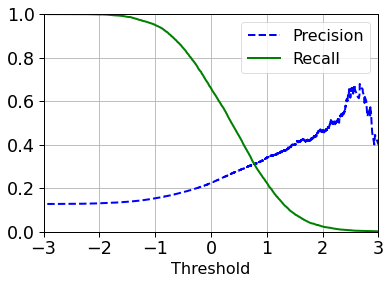

In [269]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.legend(loc="upper right", fontsize=16) 
plt.xlabel("Threshold", fontsize=16)       
plt.grid(True)                              
plt.axis([-3, 3, 0, 1])            

##### 2.3 Оценка точность/полнота (модель 2)

Точность - 0.228
Полнота - 0.67
F1 мера - 0.34


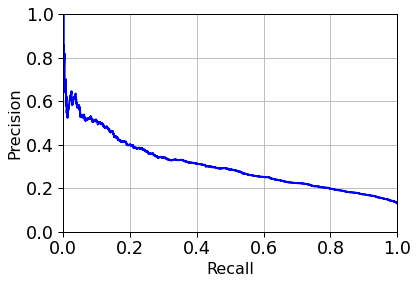

In [272]:
from sklearn.metrics import precision_recall_curve
print_all_score(y_test2, y_pred_2, y_pred_probs_2)

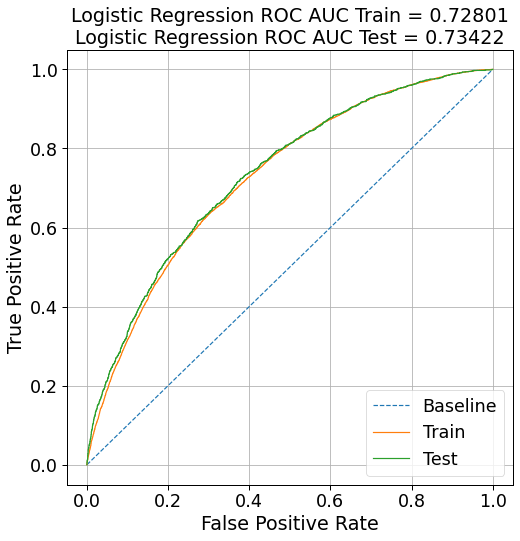

In [273]:
print_ROC_AUC(y_train, y_pred_probs_2_train, y_test, y_pred_probs_2)

In [399]:
Mod2 = model_compare('Модель 2', 'Лог.рег', 'balanced', y_test, y_pred_2, y_pred_probs_2)
Models = pd.concat([Models, Mod2], ignore_index=True, axis=0)
Models

,Модель,Алгоритм,Баланс,Точность,Полнота,F1 мера,ROC AUC
0,Модель 1,Лог.рег,Нет,0.625,0.03,0.057,0.733812
1,Модель 2,Лог.рег,balanced,0.228,0.67,0.340,0.734225


С применением балансировки точность модели упала, но значительно выросла полнота. Иными словами почти 70% клиентов, которые не смогут выплатить кредит его не получат, но будут страдать и те, кто кредит выплатит, однако неполучит его. 
Переобучения в данном случае нет.

### Модель 3

- алгоритм: лог.регрессия

- метод избавления от дисбаланса классов: настроен вручную

In [382]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=RS)

##### 3.1 Обучение

In [299]:
# Баланс выбирался вручную на основе матрицы ошибок. Выбирлся тот где F1 мера лучше, чем у модели 2.
balance = {0:0.2, 1:0.8}

In [300]:
Model_3 = LogisticRegression(max_iter=1000, class_weight=balance, random_state=RS, )


Model_3.fit(X_train, y_train)
#Значения
y_pred_3 = Model_3.predict(X_test)
# Вероятности
y_pred_probs_3 = Model_3.predict_proba(X_test)

# Посчитаем показатели для обучающего набора, что бы следить за переобучением
#Значения
y_pred_3_train = Model_3.predict(X_train)
# Вероятности
y_pred_probs_3_train = Model_3.predict_proba(X_train)
 
# Для кривой порога
y_scores_3 = cross_val_predict(Model_3, X_train, y_train, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_3) 

##### 3.2 Матрица ошибок модели 3

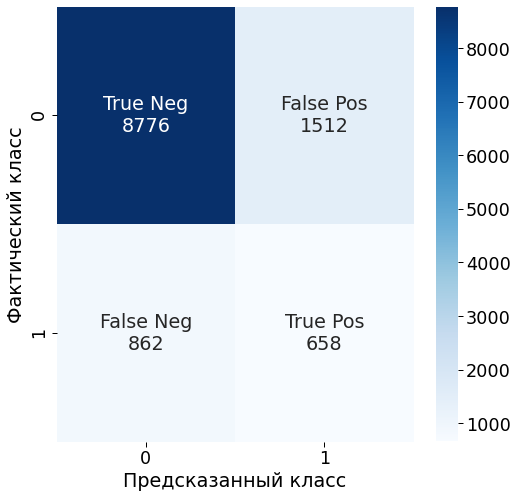

In [301]:
print_CM(y_test, y_pred_3)

##### 3.3 Отрисовка порога (модель 3)


(-3.0, 3.0, 0.0, 1.0)

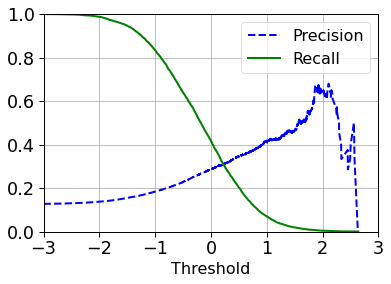

In [303]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.legend(loc="upper right", fontsize=16) 
plt.xlabel("Threshold", fontsize=16)       
plt.grid(True)                              
plt.axis([-3, 3, 0, 1])            

##### 1.3 Оценка точность/полнота

Точность - 0.303
Полнота - 0.433
F1 мера - 0.357


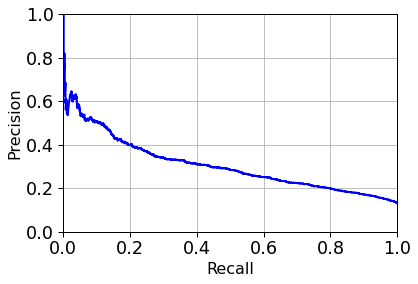

In [304]:
from sklearn.metrics import precision_recall_curve
print_all_score(y_test, y_pred_3, y_pred_probs_3)

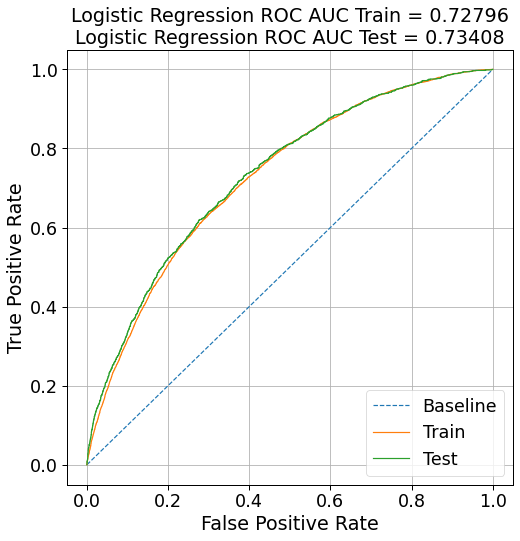

In [305]:
print_ROC_AUC(y_train, y_pred_probs_3_train, y_test, y_pred_probs_3)

In [400]:
Mod3 = model_compare('Модель 3', 'Лог.рег', '0:0.2, 1:0.8', y_test, y_pred_3, y_pred_probs_3)
Models = pd.concat([Models, Mod3], ignore_index=True,axis=0)
Models

,Модель,Алгоритм,Баланс,Точность,Полнота,F1 мера,ROC AUC
0,Модель 1,Лог.рег,Нет,0.625,0.030,0.057,0.733812
1,Модель 2,Лог.рег,balanced,0.228,0.670,0.340,0.734225
2,Модель 3,Лог.рег,"0:0.2, 1:0.8",0.303,0.433,0.357,0.734083


Повысили точность, за счет полноты, F1 мера стала лучше, чем при балансировке с помощью balanced. А вот ROC-AUC стала ниже. 

### 4. Поиск оптимальных параметров для моделей лог.регресии

- алгоритм: лог.регрессия

- поиск параметров с помощью GridSearchCV (баланс, решатель, регуляризация и т.д.)

In [335]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=RS)

In [344]:
balance

{0: 0.2, 1: 0.8}

##### 4.1 Обучение

Сейчас поищем лучшие парметры для модель ореентирующуюся на лучшее значение F1 меры. То есть для решения бизнес задачи. 

In [378]:
C = np.logspace(0, 4, 10)

In [381]:
%%time

from sklearn.model_selection import GridSearchCV
model_BP = LogisticRegression(max_iter=1000, random_state=RS)
param_grid = [
    {
     'penalty': ['l1'],
     'C': C,
     'solver': ['liblinear'], 
     'class_weight':[None, 'balanced', balance]}, 
    {
     'penalty': ['l2'],
     'C': C,
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':[None, 'balanced', balance]}, 
    {
     'penalty': ['none'],
     
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':[None, 'balanced', balance]} 
]


gridsearch = GridSearchCV(model_BP, param_grid, scoring='f1', n_jobs=-1, error_score='raise')
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_
## печатаем параметры
best_parameters = model.get_params()
for param_name in best_parameters:
        print(param_name, best_parameters[param_name], '\n')


C 2.7825594022071245 

class_weight {0: 0.2, 1: 0.8} 

dual False 

fit_intercept True 

intercept_scaling 1 

l1_ratio None 

max_iter 1000 

multi_class auto 

n_jobs None 

penalty l2 

random_state 42 

solver newton-cg 

tol 0.0001 

verbose 0 

warm_start False 

Wall time: 7min 48s


##### 4.1.1 Посмотрим на модель с такими параметрами

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=RS)

In [390]:
Model_4_1 = LogisticRegression(C=1,
                              class_weight=balance,
                              dual=False,
                              fit_intercept=True,
                              intercept_scaling=1,
                              l1_ratio=None,
                              max_iter=1000,
                              multi_class='auto',
                              n_jobs= None,
                              penalty='l2',
                              random_state=RS,
                              solver='newton-cg',
                              tol = 0.0001,
                              verbose=0,
                              warm_start=False)

Model_4_1.fit(X_train, y_train)
#Значения
y_pred_4_1 = Model_4_1.predict(X_test)
# Вероятности
y_pred_probs_4_1 = Model_4_1.predict_proba(X_test)

# Посчитаем показатели для обучающего набора, что бы следить за переобучением
#Значения
y_pred_4_1_train = Model_4_1.predict(X_train)
# Вероятности
y_pred_probs_4_1_train = Model_4_1.predict_proba(X_train)

# Для кривой порога
y_scores_4_1 = cross_val_predict(Model_4_1, X_train, y_train, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_4_1)

##### 1.2 Матрица ошибок модели 1

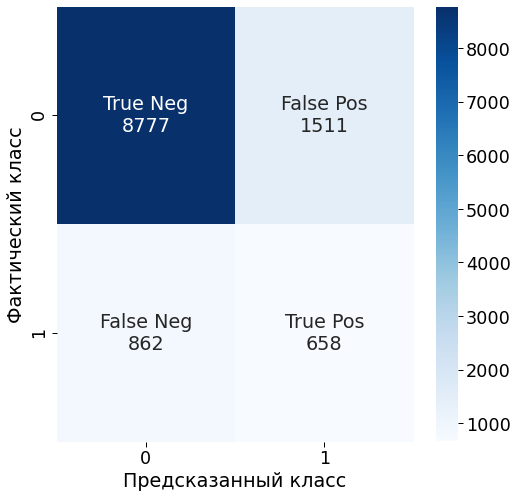

In [391]:
print_CM(y_test, y_pred_4_1)

##### 4.3 Отрисовка порога (модель 4)


(-3.0, 3.0, 0.0, 1.0)

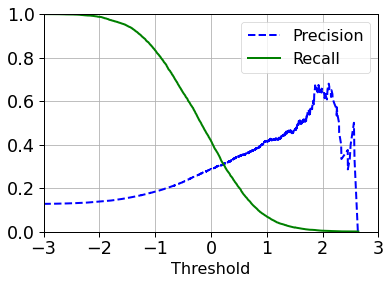

In [392]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.legend(loc="upper right", fontsize=16) 
plt.xlabel("Threshold", fontsize=16)       
plt.grid(True)                              
plt.axis([-3, 3, 0, 1])            

##### 4.4 Оценка точность/полнота

Точность - 0.303
Полнота - 0.433
F1 мера - 0.357


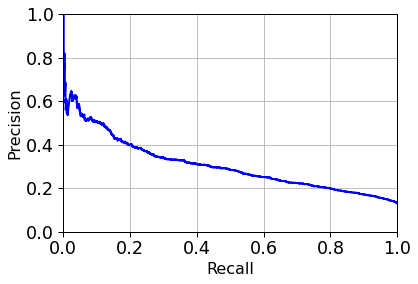

In [393]:
print_all_score(y_test, y_pred_4_1, y_pred_probs_4_1)

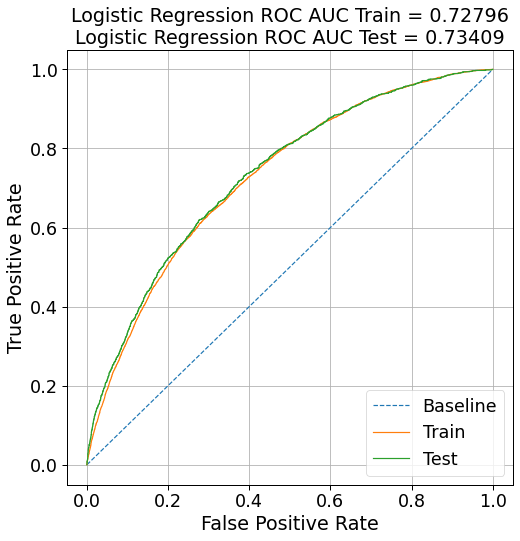

In [394]:
print_ROC_AUC(y_train, y_pred_probs_4_1_train, y_test, y_pred_probs_4_1)

Достатчоно высокая точность у модели, но полнота на очень низком уровне. Большинтсву клиентов, которые могут не отдать кредит - кредит выдадут. Очень плохая модель для банка. 
Также стоит обратить внимания, что переобучения в данном случае нет.

In [401]:
Mod4_1 = model_compare('Модель 4_1', 'Лог.рег (Парам_1)', '0:0.2, 1:0.8', y_test, y_pred_4_1, y_pred_probs_4_1)
Models = pd.concat([Models, Mod4_1], ignore_index=True,axis=0)
Models

,Модель,Алгоритм,Баланс,Точность,Полнота,F1 мера,ROC AUC
0,Модель 1,Лог.рег,Нет,0.625,0.030,0.057,0.733812
1,Модель 2,Лог.рег,balanced,0.228,0.670,0.340,0.734225
2,Модель 3,Лог.рег,"0:0.2, 1:0.8",0.303,0.433,0.357,0.734083
3,Модель 4_1,Лог.рег (Парам_1),"0:0.2, 1:0.8",0.303,0.433,0.357,0.734086


Сейчас поищем лучшие парметры для модель ореентирующуюся на лучшее значение ROC AUC. То есть для решения задач кагла 

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=RS)

In [403]:
C = np.logspace(0, 4, 10)

In [404]:
%%time

model_BP_1 = LogisticRegression(max_iter=1000, random_state=RS)
param_grid = [
    {
     'penalty': ['l1'],
     'C': C,
     'solver': ['liblinear'], 
     'class_weight':[None, 'balanced', balance]}, 
    {
     'penalty': ['l2'],
     'C': C,
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':[None, 'balanced', balance]}, 
    {
     'penalty': ['none'],
     
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':[None, 'balanced', balance]} 
]


gridsearch = GridSearchCV(model_BP_1, param_grid, scoring='roc_auc', n_jobs=-1, error_score='raise')
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_
## печатаем параметры
best_parameters = model.get_params()
for param_name in best_parameters:
        print(param_name, best_parameters[param_name], '\n')


C 1.0 

class_weight {0: 0.2, 1: 0.8} 

dual False 

fit_intercept True 

intercept_scaling 1 

l1_ratio None 

max_iter 1000 

multi_class auto 

n_jobs None 

penalty l2 

random_state 42 

solver liblinear 

tol 0.0001 

verbose 0 

warm_start False 

Wall time: 7min 42s


##### 4.1.2 Посмотрим на модель с такими параметрами

In [405]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=RS)

In [406]:
Model_4_2 = LogisticRegression(C=1,
                              class_weight=balance,
                              dual=False,
                              fit_intercept=True,
                              intercept_scaling=1,
                              l1_ratio=None,
                              max_iter=1000,
                              multi_class='auto',
                              n_jobs= None,
                              penalty='l2',
                              random_state=RS,
                              solver='liblinear',
                              tol = 0.0001,
                              verbose=0,
                              warm_start=False)

Model_4_2.fit(X_train, y_train)
#Значения
y_pred_4_2 = Model_4_2.predict(X_test)
# Вероятности
y_pred_probs_4_2 = Model_4_2.predict_proba(X_test)

# Посчитаем показатели для обучающего набора, что бы следить за переобучением
#Значения
y_pred_4_2_train = Model_4_2.predict(X_train)
# Вероятности
y_pred_probs_4_2_train = Model_4_2.predict_proba(X_train)

# Для кривой порога
y_scores_4_2 = cross_val_predict(Model_4_2, X_train, y_train, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_4_2)

##### 4.1.2 Матрица ошибок модели 4_2

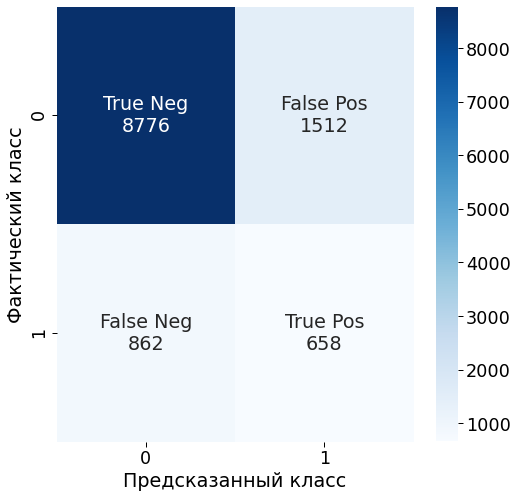

In [407]:
print_CM(y_test, y_pred_4_2)

##### 4.3 Отрисовка порога (модель 4)


(-3.0, 3.0, 0.0, 1.0)

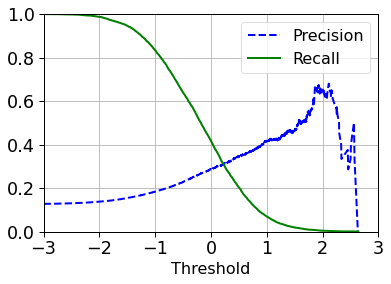

In [408]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.legend(loc="upper right", fontsize=16) 
plt.xlabel("Threshold", fontsize=16)       
plt.grid(True)                              
plt.axis([-3, 3, 0, 1])            

##### 4.4 Оценка точность/полнота

Точность - 0.303
Полнота - 0.433
F1 мера - 0.357


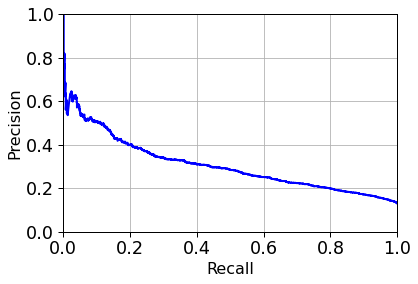

In [409]:
print_all_score(y_test, y_pred_4_2, y_pred_probs_4_2)

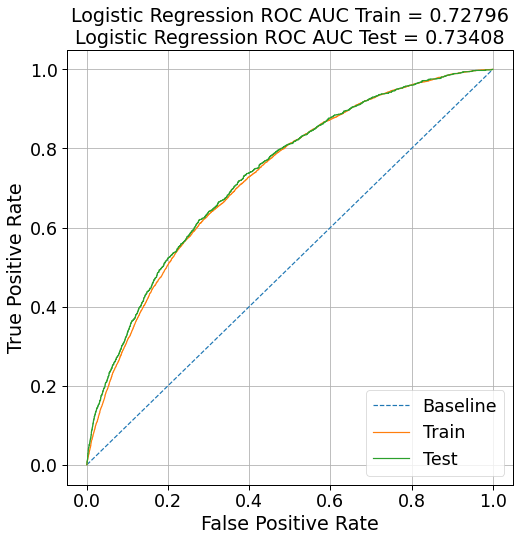

In [410]:
print_ROC_AUC(y_train, y_pred_probs_4_2_train, y_test, y_pred_probs_4_2)

Достатчоно высокая точность у модели, но полнота на очень низком уровне. Большинтсву клиентов, которые могут не отдать кредит - кредит выдадут. Очень плохая модель для банка. 
Также стоит обратить внимания, что переобучения в данном случае нет.

In [411]:
Mod4_2 = model_compare('Модель 4_1', 'Лог.рег (Парам_2)', '0:0.2, 1:0.8', y_test, y_pred_4_2, y_pred_probs_4_2)
Models = pd.concat([Models, Mod4_2], ignore_index=True,axis=0)
Models

,Модель,Алгоритм,Баланс,Точность,Полнота,F1 мера,ROC AUC
0,Модель 1,Лог.рег,Нет,0.625,0.030,0.057,0.733812
1,Модель 2,Лог.рег,balanced,0.228,0.670,0.340,0.734225
2,Модель 3,Лог.рег,"0:0.2, 1:0.8",0.303,0.433,0.357,0.734083
3,Модель 4_1,Лог.рег (Парам_1),"0:0.2, 1:0.8",0.303,0.433,0.357,0.734086
4,Модель 4_1,Лог.рег (Парам_2),"0:0.2, 1:0.8",0.303,0.433,0.357,0.734085


In [251]:
from sklearn.metrics import precision_score, recall_score, f1_score
def print_all_score(Y_TEST, Y_PRED, Y_PRED_PROB):
    precisions, recalls, thresholds = precision_recall_curve(Y_TEST, Y_PRED_PROB[:,1])
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    
    
    print('Точность - {}'.format(round(precision_score(Y_TEST, Y_PRED), 3)))
    print('Полнота - {}'.format(round(recall_score(Y_TEST, Y_PRED), 3)))
    print('F1 мера - {}'.format(round(f1_score(Y_TEST, Y_PRED), 3)))

In [234]:
from sklearn.metrics import confusion_matrix
def print_CM(Y_TEST, Y_PRED):
    ''' 
    Функция для визуализации матрицы ошибок
    '''
    
    # Визуализация confusion matrix:
    plt.figure(figsize=(8,8))
    sns.set_context(context='paper', font_scale=2, rc=None)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    confusion_matrix(Y_TEST, Y_PRED).flatten()]
    labels = [f'{v1}\n{v2}' for v1, v2 in
              zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(confusion_matrix(Y_TEST, Y_PRED), annot=labels, fmt='', cmap='Blues')
    plt.ylabel('Фактический класс')
    plt.xlabel('Предсказанный класс')

In [232]:
def print_ROC_AUC(Y_TRAIN, Y_PRED_TRAIN, Y_TEST, Y_PRED):
    
    fpr_train, tpr_train, threshold_train = roc_curve(Y_TRAIN, Y_PRED_TRAIN[:,1])
    roc_auc_train = roc_auc_score(Y_TRAIN, Y_PRED_TRAIN[:,1])

    fpr_test, tpr_test, threshold_test = roc_curve(Y_TEST, Y_PRED[:,1])
    roc_auc_test = roc_auc_score(Y_TEST, Y_PRED[:,1])


    plt.figure(figsize=(8, 8))
    plt.plot([0, 1], label='Baseline', linestyle = '--')
    plt.plot(fpr_train, tpr_train, label = 'Train')
    plt.plot(fpr_test, tpr_test, label = 'Test')
    plt.title('Logistic Regression ROC AUC Train = {a}\nLogistic Regression ROC AUC Test = {b}'
              .format(a = roc_auc_train.round(5), b = roc_auc_test.round(5)))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.grid(True)


##### Настройка гиперпараметров

In [369]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

Лучшее Penalty: l1
Лучшее C: 21.544346900318832


##### Посмотрим насколько каждый атрибут связан с таргет-переменной

In [37]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Видна корреляция с медианным доходом, а также с широтой (обратная корр). Т.е. цена имеет тенденцию к снижению при дижении на Север. 

Text(0, 0.5, 'Latitude')

<Figure size 864x1080 with 0 Axes>

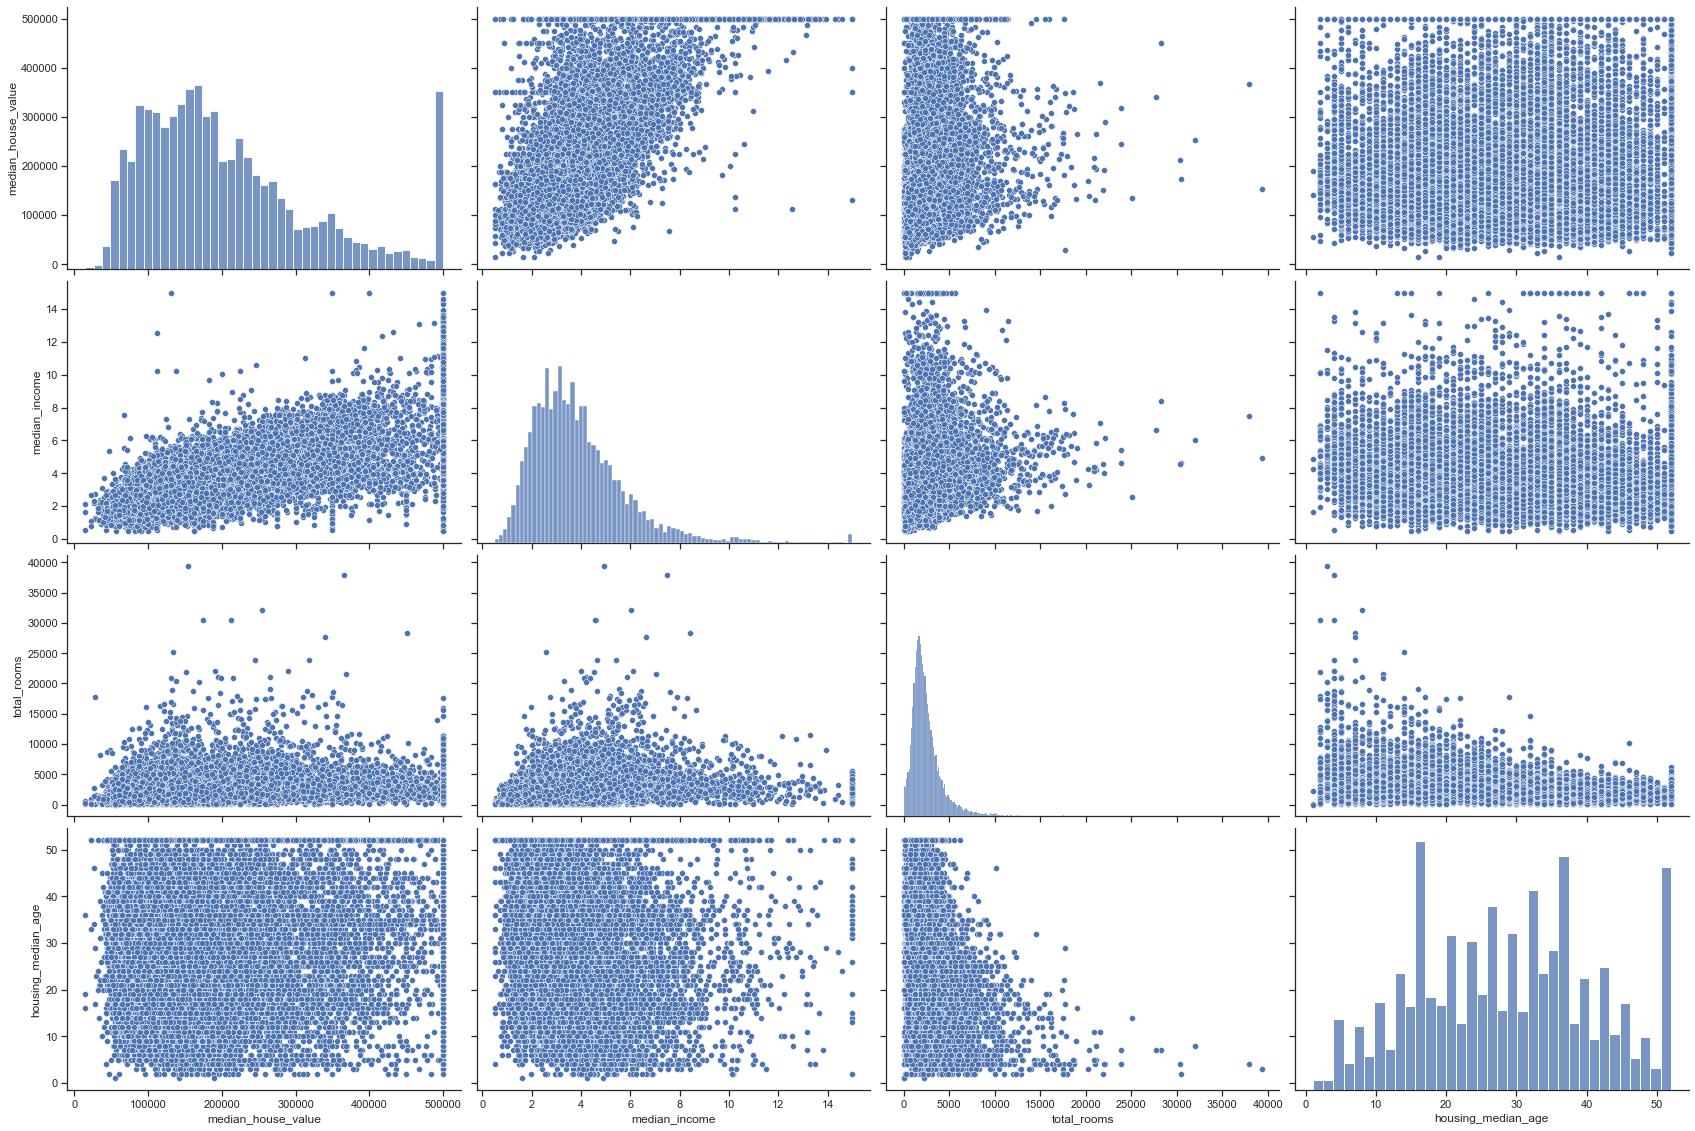

In [38]:
sns.set(style="ticks")
plt.figure(figsize=(12, 15))
sns.pairplot(housing[["median_house_value", "median_income", "total_rooms", "housing_median_age"]], 
             height=4, 
             aspect=1.5)
plt.ylabel("Latitude", fontsize=14)
#save_fig('Парные корреляции')

Saving figure scatter_matrix_plot


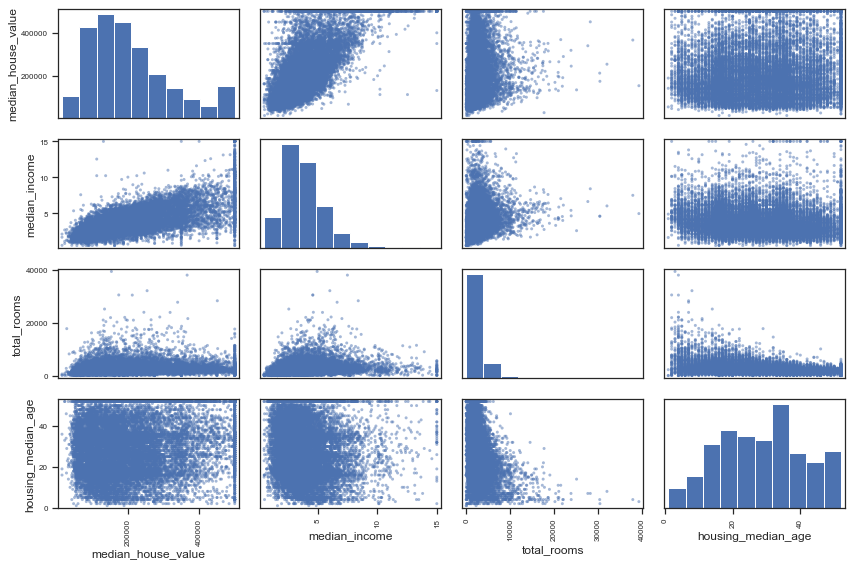

In [39]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Посмотрим поближе на очевидную корреляцию таргета с медианной зарплатой

Saving figure Зависимость стоимости жилья от зарплаты


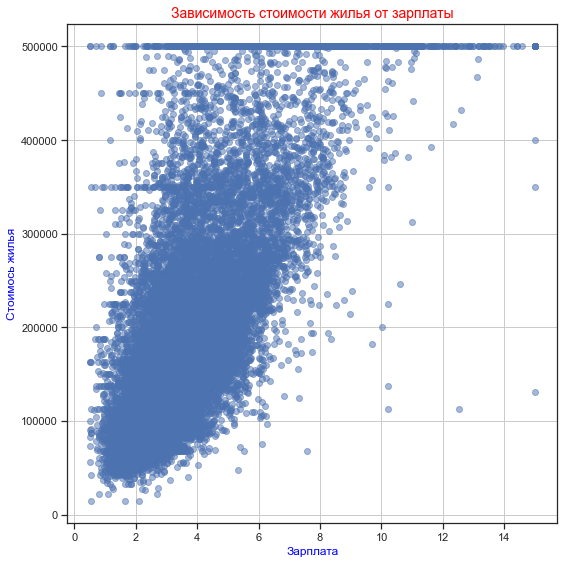

In [40]:
plt.figure(figsize=(8, 8))
plt.scatter(x=housing['median_income'], y=housing['median_house_value'], alpha=0.5)
plt.xlabel('Зарплата', fontsize=12, color='blue')
plt.ylabel('Стоимось жилья', fontsize=12, color='blue')
plt.title('Зависимость стоимости жилья от зарплаты', fontsize=14, color='red')
plt.grid(which='major')
plt.grid(which='minor')
save_fig('Зависимость стоимости жилья от зарплаты')

Заметно несколько горизонтальных линий, типо 500_000, 450_000 и т.д. Можно удалить такие округа, чтобы АМО не воспроизводили такие индивидуальные особенности.

И так далее, ищем особенности в данных, исследуем их. Рисуем.

<a id='3.6'> </a>
### 3.6 Эксперементирование с комбинацией атрибутов (feature engineering)

Например. Суммарное количество комнат в окурге нам не интересно, если мы не знаем сколько есть домов. А вот количество комнат на дом будет полезным. 

Общее количесвто спален не интресно, а вот количество спален на количество комнат - интресно.

Также интеренсо население на дом. 

In [41]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

Посмотрим на матрицу корр. 

In [42]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Saving figure Матрица корреляций с новыми признаками


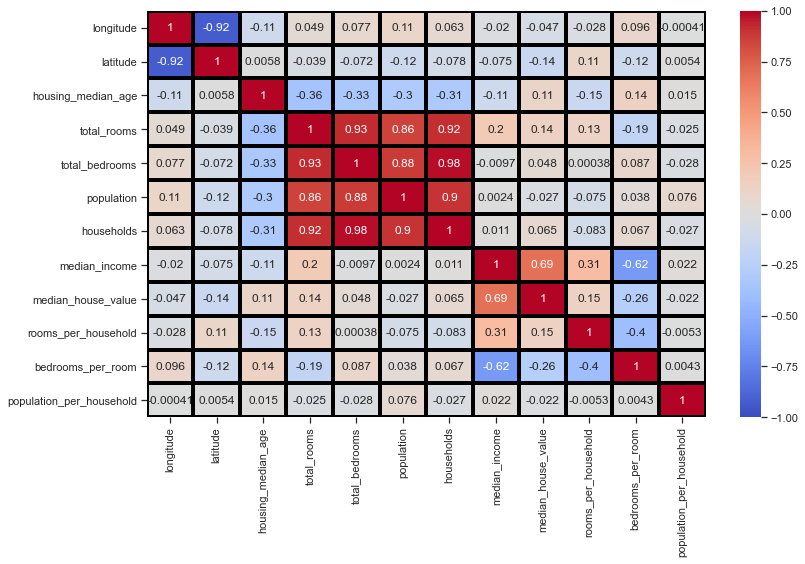

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
save_fig('Матрица корреляций с новыми признаками')

Отметим, что новый признак bedrooms_per_room имеет большую корреляцию с таргетом. А также rooms_per_household коррелирует больше чем протсо total_rooms.

Этот пункт 3.6 не окончательный, и можно несколько раз возвращаться к нему. 

<a id='3.7'> </a>
### 3.7 Поиск и добавление дополнительных данных (при необходимости)

<a id='4'> </a>
### 4. Подготовка данных для алгоритмов машинного обучения

Нужно добавить несколько своих функций для трансформации данных.
Но сейчас рассмотрим к чистому обучающему набору. 

Более того разделим прогнозаторы(переменные) и метки (в нашем случае она одна). Потому, что иногда мы нехотим применять те же самые трансформации и к целевым меткам и к прогнозаторам. 

In [44]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

<a id='4.1'> </a>
### 4.1 Очистка данных 

##### 4.1.1 Отсуствующие данные 
Уже известные методы борьбы с отсутсвующими данными: (на примере пустых значений в переменно "total_bedrooms")

- Вар. 1 Избавиться от соттсвуствующих округов (где данных нет по этому признаку)

- Вар. 2 Избавиться от всего атрибута 

- Вар. 3 Установить отсуствующие значение на 0, среднее, медиану и т.д.

In [45]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [46]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # вариант 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [47]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # вариант 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [48]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # вариант 3

sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


##### Реализация замены через библиотеку sklearn:

In [49]:
from sklearn.impute import SimpleImputer
# Создаем объект класса "простой приписыватель", и говорим, что менять нужно на "медиану"
imputer = SimpleImputer(strategy="median")

т.к. imputer  работает только с числовыми форматами, удалим из нашего сета текстовый "ocean_proximity" и передадим в него числовой сет

In [50]:
housing_num = housing.drop("ocean_proximity", axis=1)
# ну либо так, выбрав в сете только числа: housing_num = housing.select_dtypes(include=[np.number])

In [51]:
# Операция замены
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [52]:
# Здесь медианы по всем столбцам
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [53]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [54]:
# Теперь трансформируем нас сет. Эта опреация применят медиану по каждой колонке если есть пустые значения 
# Но X это массив с цифрами! Его нужно обратить в датафрейм
X = imputer.transform(housing_num)

In [55]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [56]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [57]:
housing_tr.loc[sample_incomplete_rows.index.values] # Смотрим только на индексы, где были нули.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


##### 4.1.2 Категориальные данные. (Посмотри гайд № 1 - Категориальные данные)

In [58]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [59]:
# Используем встроенный метод для перевода категорий в цифру
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder() #  Создаем объект класса OrdinalEncoder
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) # фит_трансформ...
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [60]:
# Просмотр какие категории у нас есть в этой колонке 
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Стоит учитывать, что здесь 0 и 4 имеют веса. То есть 0 меньше 4. В данном случае это неправильно. Нупример если быв здесь были категории типа "плохо", "хорошо", то 0 плохо меньше 4 хорошо и т.д. В нашем случе лучше создавать дамми переменные. 

In [61]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

По умолчанию класс OneHotEncoder возвращает разреженный массив, но при необходимости мы можем преобразовать его в плотный массив, вызвав метод toarray() :

In [62]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [63]:
# Просмотр какие категории у нас есть в этой колонке 
cat_encoder.categories_ # Категории смотри у объекта класса, а не у матрицы

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

##### Совет! 
Если категорий много, то чтобы не создавать огормные матрицы с 0 и 1, можно заменить категории на цифры. Наприме в нашем случае можно проставить расстояния до окена в км. А код страны заменить на население страны или ВВП и т.д.

##### 4.1.3 Избавление от выбросов

<a id='4.2'> </a>
### 4.2 Удаление ненужных признаков

<a id='4.3'> </a>
### 4.3 Создание новых признаков

- Дискретизация непрерывных признаков

- Разбиение признаков на составные части (время\дата, категории)

- Добавление перепективные трансформации признаков (логорифм, квадрат, корень и т.д.)

<a id='4.4'> </a>
### 4.4 Масштабирование № 1. Специальные трансформеры 

In [64]:
housing.values[:, 4]

array([351.0, 108.0, 471.0, ..., 872.0, 380.0, 682.0], dtype=object)

##### С этим нужно разобраться. Тут класс для автосоздания признаков

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

###### автоподбор индексов колонок

In [66]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [67]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847


<a id='4.5'> </a>
### 4.5 Масштабирование №2. Нормализация и стандартизация

Стандартизация менее подвержена выбросам.

Все трансформаторы нужно обучать на трейне, а потом только применять к тестовым данным.

##### 4.5.1 Конвейры трансформации

В ходе обучения приходится применять много трансформаций и преобразования данных. Лучше использовать pipeline.

Такой конструктор pipeline принимает список пар "имя/оценщик", определяющий последоваттельность шагов. Все кроме последнего оценщика ОБЯЗАНЫ быть трансформаторами, т.е. иметь метод fit_transform. 

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# В данном случае выполняем только ддя численного датасета
# Определим название нашего конвейра и какие трансформации будут выполнены
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Этот будет заполнять пустые медианой 
    ('atrribs_adder', CombinedAttributesAdder()), # Это наш класс определенный выше, добавляет от 2 до 3 новых столбцов
    ('std_scaler', StandardScaler()) #  Стандартизатор
    ])

# Применяем наш конвейр 
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [74]:
# На выходе массив numpy
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

#### 4.5.2 Конвейр к числовым и категориальным данным

In [77]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # Получаем список столбцов
cat_attribs = ["ocean_proximity"] # Перечисляем категориальыне атрибуты 

# Создаем общий конвейр 
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), # Название/ конвейр (либо трансформатор) для чиловых/ какие столбцы трансформировать
        ("cat", OneHotEncoder(), cat_attribs), # Название/ трансформатор / название столбцов
    ])

housing_prepared = full_pipeline.fit_transform(housing) # Итоговый сет и все трансформации 

In [78]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

Добрый день!
Скажите пожалуйста, будет ли лучше если сделать вот как:
1. Мы не объединяем кагловские train и test
2. Берем train  разбиваем его на две части train_TRAIN и train_TEST (с использованием Stratified)
3. Смотрим, добовляем признаки, полиномы, логарифмы и т.д.
4. Зашиваем преобразования в pipeline
5. На обученом pipelene преобразуем наш train_TEST
6. Учим модели, гиперпараметры, находим нужную модель 
7. Прогоняем кагловский test через обученый pipelene и уже считаем submission

или это все пустая трата времени?

##### Внимание! 
Нужно обратить внимание, что OneHotEncoder возвращает РАЗРЕЖЕННУЮ матрицу, в то время как num_pipeline - плотную матрицу. 
Когда такие две матрицы попадают в объект типа ColumnTransformer производит оценку плотности итоговой матрицы (т.е. пропорцию ненулевых элементов) и возвращает разряженную матрицу, если плотность оказывается меньше указанного порога (по умолчанию. sparse_threshold=0.3). В нашем случае он возвращает плотную матрицу. 

В общем-то это есть общий конвейр для преобразования всего датасета в рабочий( транформированный ) 

In [79]:
housing_prepared.shape

(16512, 16)

<a id='5'> </a>
# 5. Выбор и обучение модели

1. Обучить множество созданых на скорую руку моделей из разных категорий (линейну, наивную байусовскую, SVM, случаный лес нейронку и т.д) используя стандартные парметры.

2. Измерить и сравнить их эффективность (здесь применить кросс-валидацию)

3. Проанализировать наиболее значимые переменнеы для каждого алгоритма

4. Анализ типов ошибок, допускаемых моделями (Что использовал бы человек, чтобы избежать таких ошибок) 

5. Провести быстрый цикл конструирования и выбора признаков

6. Выполнить пару итераций шагов с 1 по 5.

7. Составить список 3-5 первых моделей. Желательно которые совершают разные типы ошибок.

<a id='5.1'> </a>
### 5.1 Обучение о оценка с помощью обучающего набора

##### 5.1.1 Сначала обучим линейную регрессию

In [81]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

##### Опробуем  ее на нескольких образцах нашего обучающего набора 

In [85]:
some_data = housing.iloc[:5] # Выбираем несколько строк
some_labels = housing_labels.iloc[:5] # Столько же выриантов ответа
some_data_prepared = full_pipeline.transform(some_data) # Готовим строки ибо они из сырого сета

# Предсказываем
print("Предсказания:", lin_reg.predict(some_data_prepared))

Предсказания: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [84]:
print("Ответы:", list(some_labels))

Ответы: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


##### Можно сравнить ответы и пердсказания. Разницв давольно большая

##### 5.1.2 Посчитаем ошибку на всем трейне 

In [86]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [90]:
# Это средняя абсолютная ошибка
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

Значения цены на жизье колеблятся в пределах 120_000 до 265_000, у нас ошибка в 68_628. Давольно большая

Выходит модель наша нынешняя - <B> недообучена. </B> Исправим это:
     
     - Выбор более мощной модели 
     
     - Снабжение алгритма лучшими признаками (например логорифм численности населения)
     
     - Скоращение ограничений модели (в данном случае мы не проводили регуляризуцию, поэтому этот пункт тут не работает)
     
Но сначала лучше обучить <B>более сложную модель</B>. Попробуем Дерево решений. Этот алгоритм находит сложные неленейные связи

##### 5.1.3 Обучение более сложной модели для сравнения

In [91]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [92]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Здесь явно модель <B> переобучена </B>. Надо использовать метод кросс-валидации. Нам нужно проверять ошибку в рамках обучающего датасета.

<a id='5.2'> </a>
### 5.2 Кросс-валидация

Тут стоить понимать, что есть способа такой проверки датасета (вообще на наличие ошибок):

1. Это использовать train_tets_split

2. Использовать cross_validation

##### 5.2.1 Кросс-валидация для дерева

In [94]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, # наша модель/ Х/ у
                        scoring='neg_mean_squared_error', # Оценщик, в нашем случае MSE
                        cv=10) # Делим на 10 частей наш X (9 трейн 1 тест)

# В итоге получаем массив с 10 MSE
tree_rmse_scores = np.sqrt(-scores) # "-" тут потому, что в sklearn считают положительное лучшим исходом, нам же нужно уменьшать

In [95]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


В итоге реальная оценка от модели с деревом принятия решений вышла как:

<B>71407 +- 2439.4 </B> - Хуже чем в линейной регрессии

##### 5.2.2 Кросс-валидация для лин.регресии

In [96]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345084
Standard deviation: 2731.6740017983498


В итоге реальная оценка от модели с лин.регрессией вышла как:

<B>69052 +- 2731.6 </B> 

##### 5.2.3 Обучение и кросс-валидация для Леса решений

In [97]:
from sklearn.ensemble import RandomForestRegressor
# Обучение
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [98]:
housing_predictions = forest_reg.predict(housing_prepared)
# Расчет СКО на всем трейне (возможно переобучение)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [99]:
# Кросс- валидация для леса решений (занимает время)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Standard deviation: 2097.0810550985693


В итоге реальная оценка от модели с лесом решений вышла как:

<B>50182 +- 2097 </B> 

In [120]:
model_set_1 = pd.DataFrame({
    "Тип модели": ['Линейная регрессия', 'Дерево решений', 'Случайный лес'],
    "Ошибка на всем train": [round(lin_rmse, 2), round(tree_rmse,2), round(forest_rmse, 2)],
    'Ошибка на 10-к КВ': [round(np.mean(lin_rmse_scores), 2),
                          round(np.mean(tree_rmse_scores),2),
                          round(np.mean(forest_rmse_scores),2)],
    'Переобучение': ['да','да' ,'да' ]
}).sort_index()

In [121]:
model_set_1

,Тип модели,Ошибка на всем train,Ошибка на 10-к КВ,Переобучение
0,Линейная регрессия,68628.20,69052.46,да
1,Дерево решений,0.00,71407.69,да
2,Случайный лес,18603.52,50182.30,да
